# 2022-08-07
# 에이다부스트 복습 

### 연습 및 코드 리뷰 

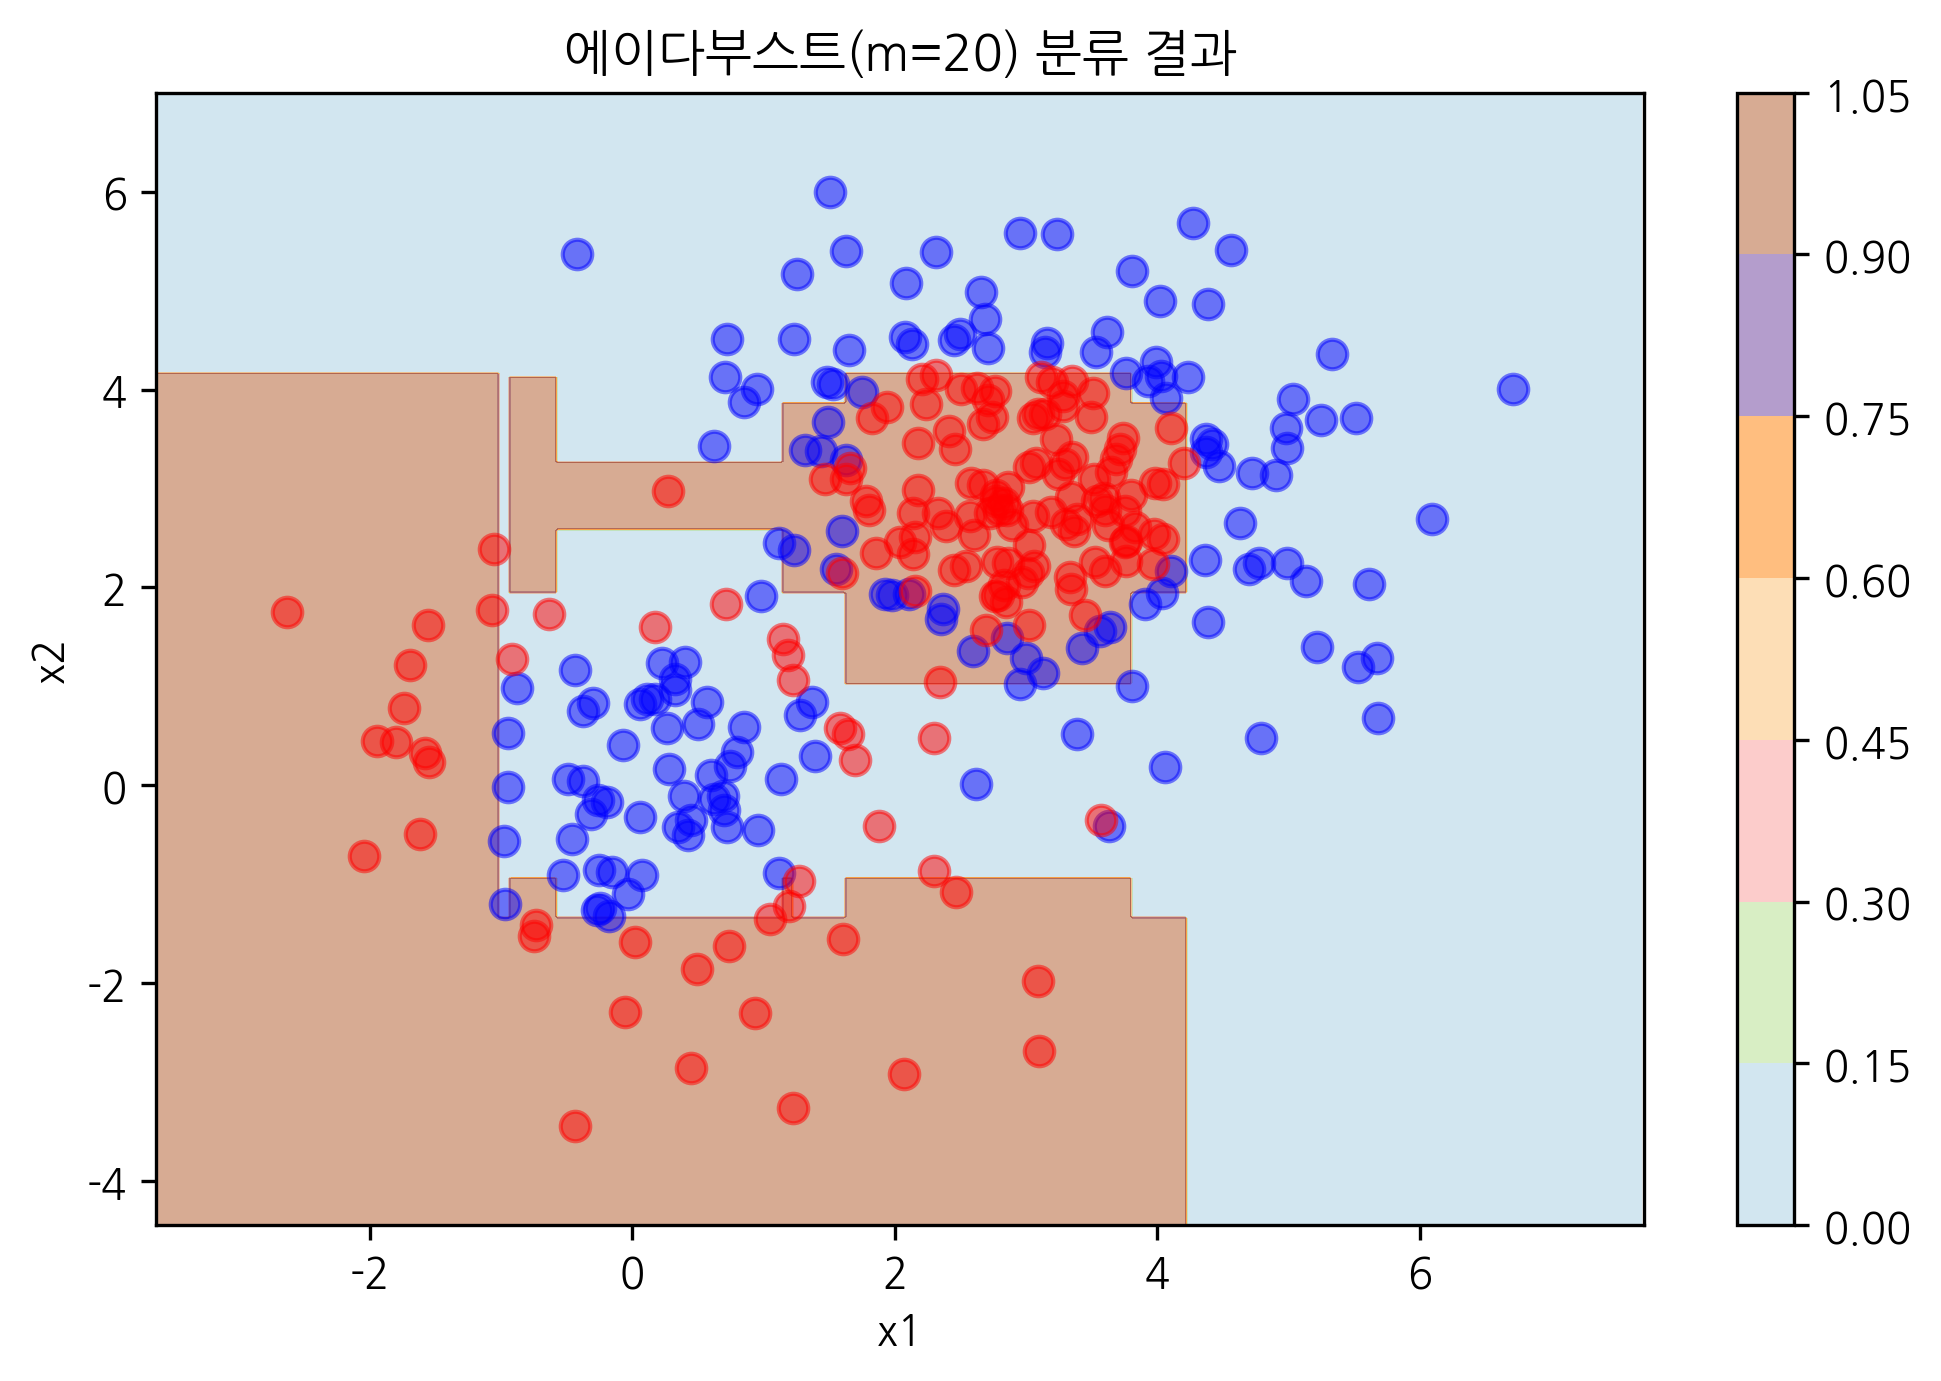

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=100, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

class MyAdaBoostClassifier(AdaBoostClassifier):
    
    def __init__(self,
                 base_estimator=None,
                 n_estimators=50,
                 learning_rate=1.,
                 algorithm='SAMME.R',
                 random_state=None):

        super(MyAdaBoostClassifier, self).__init__(
            base_estimator=base_estimator,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=random_state)
        self.sample_weight = [None] * n_estimators
        
    def _boost(self, iboost, X, y, sample_weight, random_state):
        sample_weight, estimator_weight, estimator_error = super(MyAdaBoostClassifier, self)._boost(iboost, X, y, sample_weight, random_state)
        self.sample_weight[iboost] = sample_weight.copy()
        return sample_weight, estimator_weight, estimator_error
    
model_ada = MyAdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=0), n_estimators=20)
model_ada.fit(X, y)

def plot_result(model, title="분류결과", legend=False, s=50):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
    if isinstance(model, list):
        Y = model[0].predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
        for i in range(len(model) - 1):
            Y += model[i + 1].predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    else:
        Y = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    cs = plt.contourf(xx1, xx2, Y, cmap=plt.cm.Paired, alpha=0.5)
    for i, n, c in zip(range(2), "01", "br"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, s=s, alpha=0.5, label="Class %s" % n)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.colorbar(cs)
    if legend:
        plt.legend()
    plt.grid(False)

plot_result(model_ada, "에이다부스트(m=20) 분류 결과")

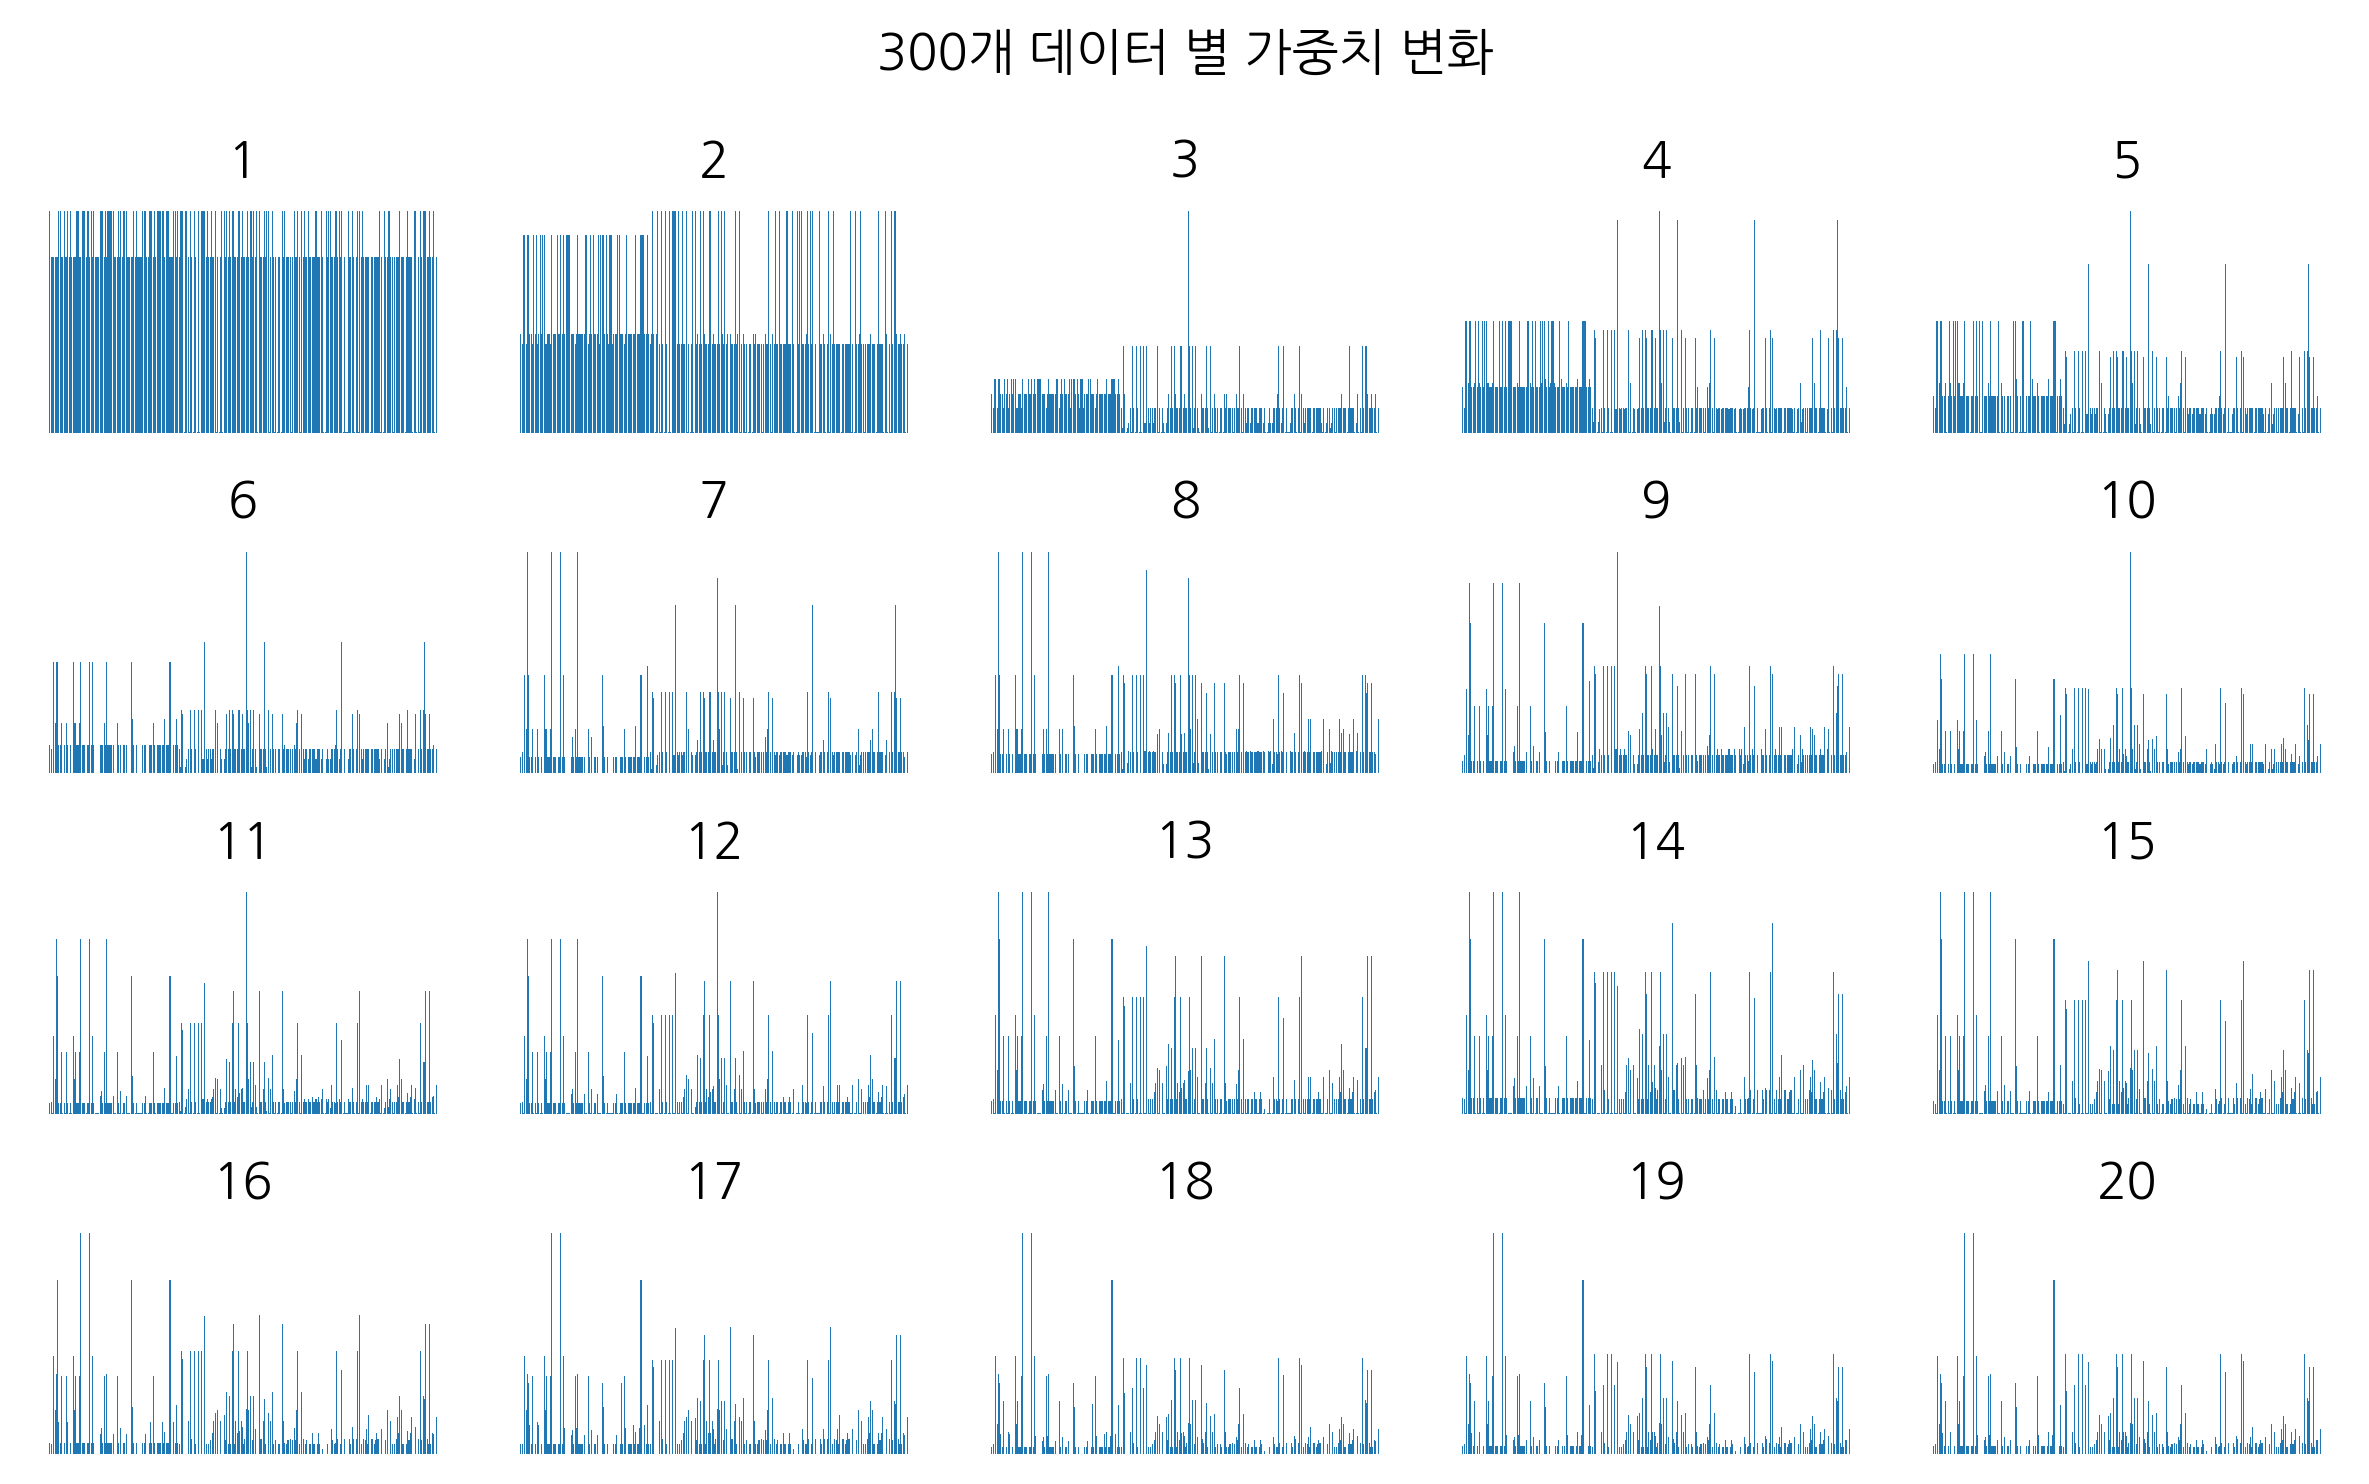

In [88]:
for i in range(1, 21) :
    plt.subplot(4,5,i)

    xx = model_ada.sample_weight[i-1]
    plt.bar(range(len(xx)), xx)
    plt.title(f'{i}')
    plt.axis('off')

plt.suptitle('300개 데이터 별 가중치 변화')
plt.tight_layout() 
plt.show() 

In [21]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))

In [22]:
sample1 = np.c_[xx1.ravel(), xx2.ravel()]; sample1

array([[-3.62758315, -4.44338059],
       [-3.60758315, -4.44338059],
       [-3.58758315, -4.44338059],
       ...,
       [ 7.65241685,  6.99661941],
       [ 7.67241685,  6.99661941],
       [ 7.69241685,  6.99661941]])

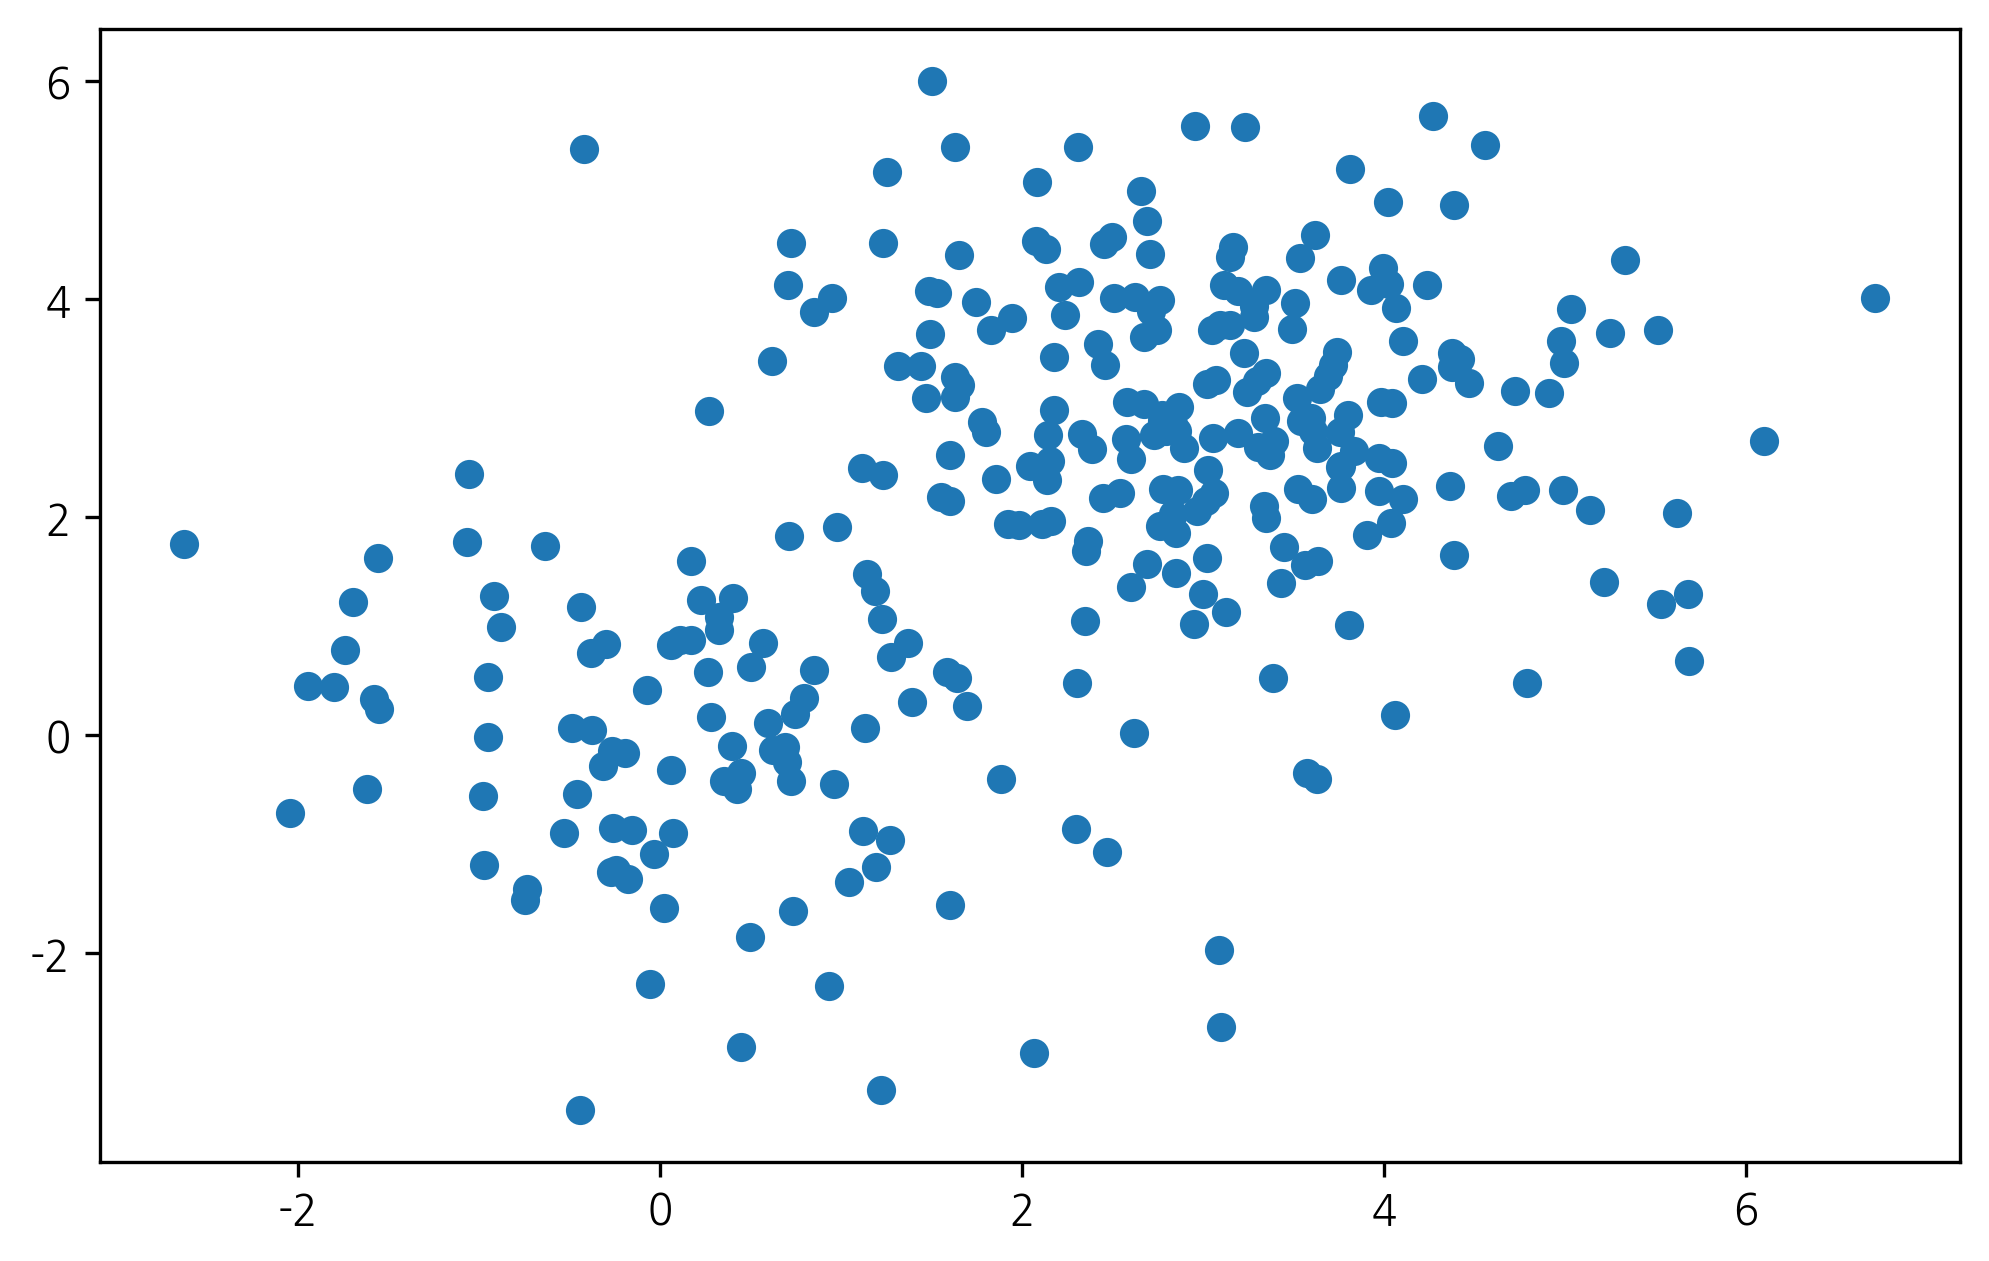

In [23]:

X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=100, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

plt.scatter(X[:,0], X[:,1])

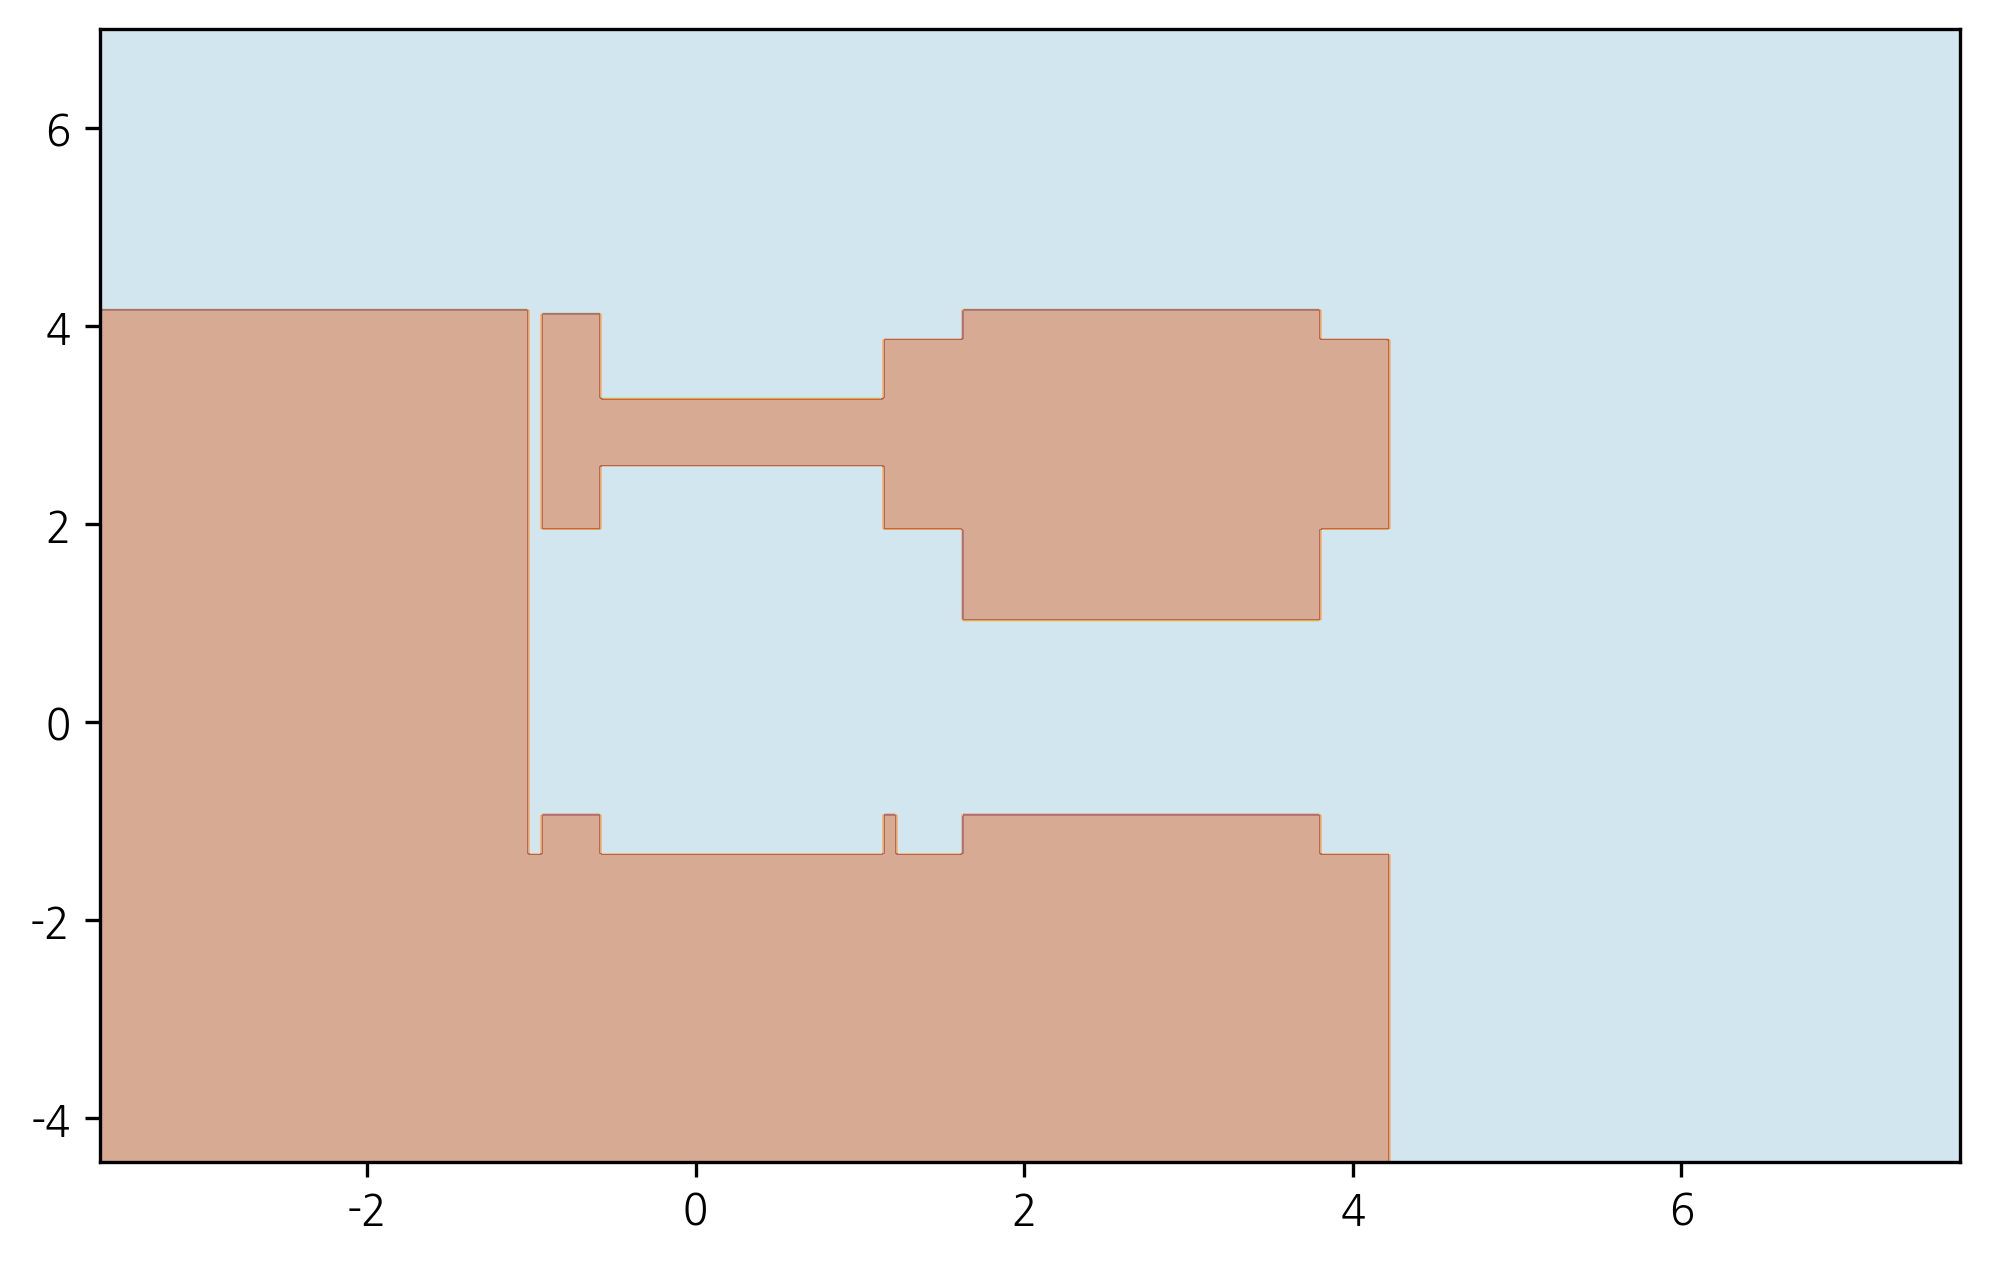

In [24]:
Y = model_ada.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

plt.contourf(xx1, xx2, Y, cmap=plt.cm.Paired, alpha=0.5)

### 시작 

In [25]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

X1, y1 = make_gaussian_quantiles(cov=2.,n_samples=100, n_features=2,n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=200, n_features=2,n_classes=2, random_state=1)

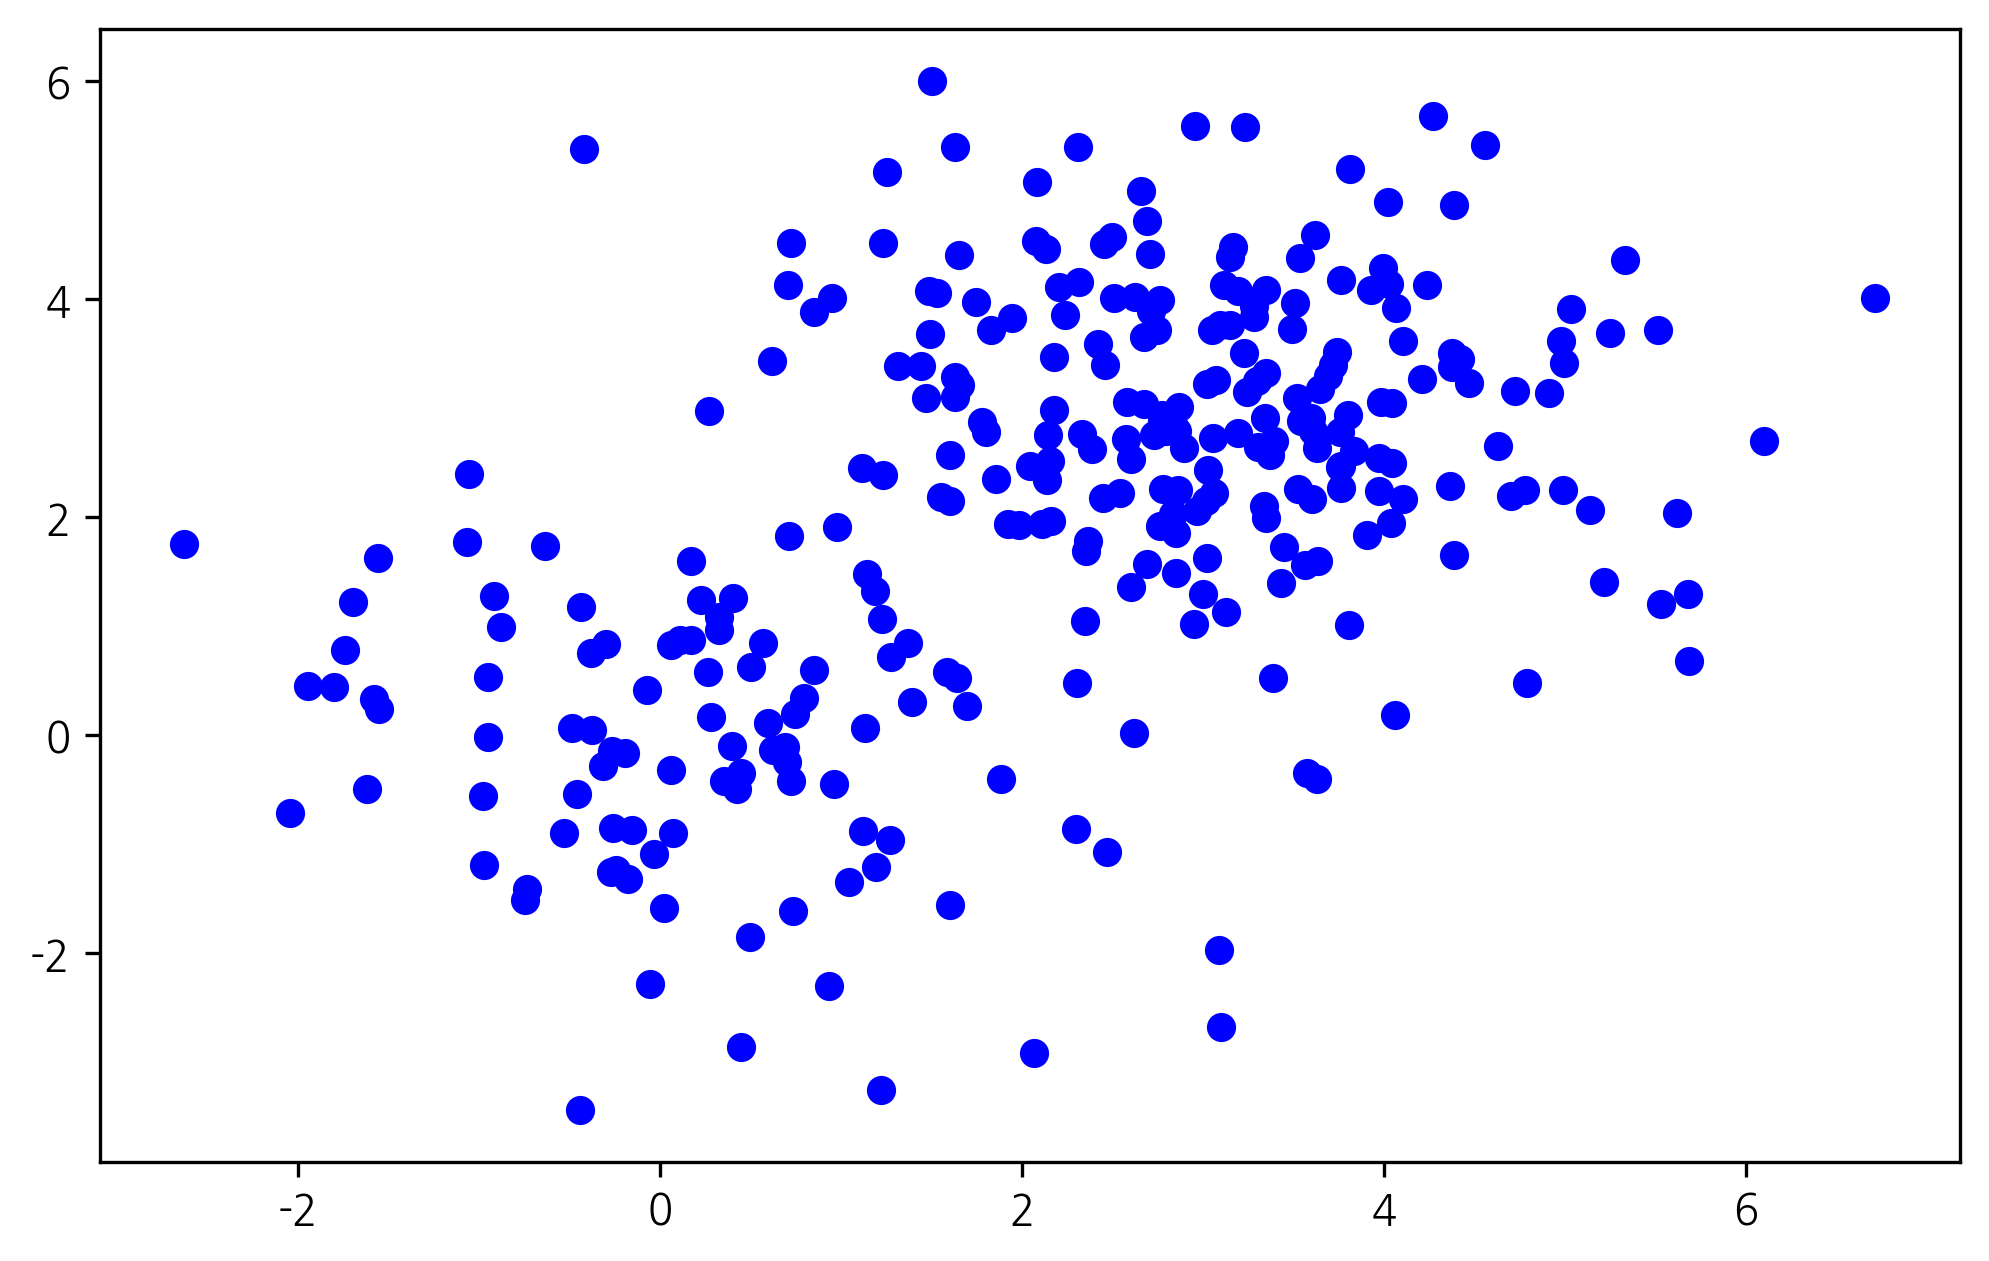

In [26]:
plt.scatter(X1[:,0], X1[:,1], c='b')
plt.scatter(X2[:,0], X2[:,1], c='b')

In [27]:
import numpy as np 
X= np.concatenate([X1, X2]) ; X
y = np.concatenate([y1, -y2+1]) ; y

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1])

In [28]:
# sample_weight 추출 위해 커스텀 한 에이다부스트 모형 클래스 정의 
class MyAdaBoostClassifier(AdaBoostClassifier):
    
    def __init__(self,
                 base_estimator=None,
                 n_estimators=50,
                 learning_rate=1.,
                 algorithm='SAMME.R',
                 random_state=None):

        super(MyAdaBoostClassifier, self).__init__(
            base_estimator=base_estimator,
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            random_state=random_state)
        self.sample_weight = [None] * n_estimators
        
    def _boost(self, iboost, X, y, sample_weight, random_state):
        sample_weight, estimator_weight, estimator_error = \
        super(MyAdaBoostClassifier, self)._boost(iboost, X, y, sample_weight, random_state)
        self.sample_weight[iboost] = sample_weight.copy()
        return sample_weight, estimator_weight, estimator_error

In [29]:
model_ada = MyAdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=0), n_estimators=20).fit(X, y)

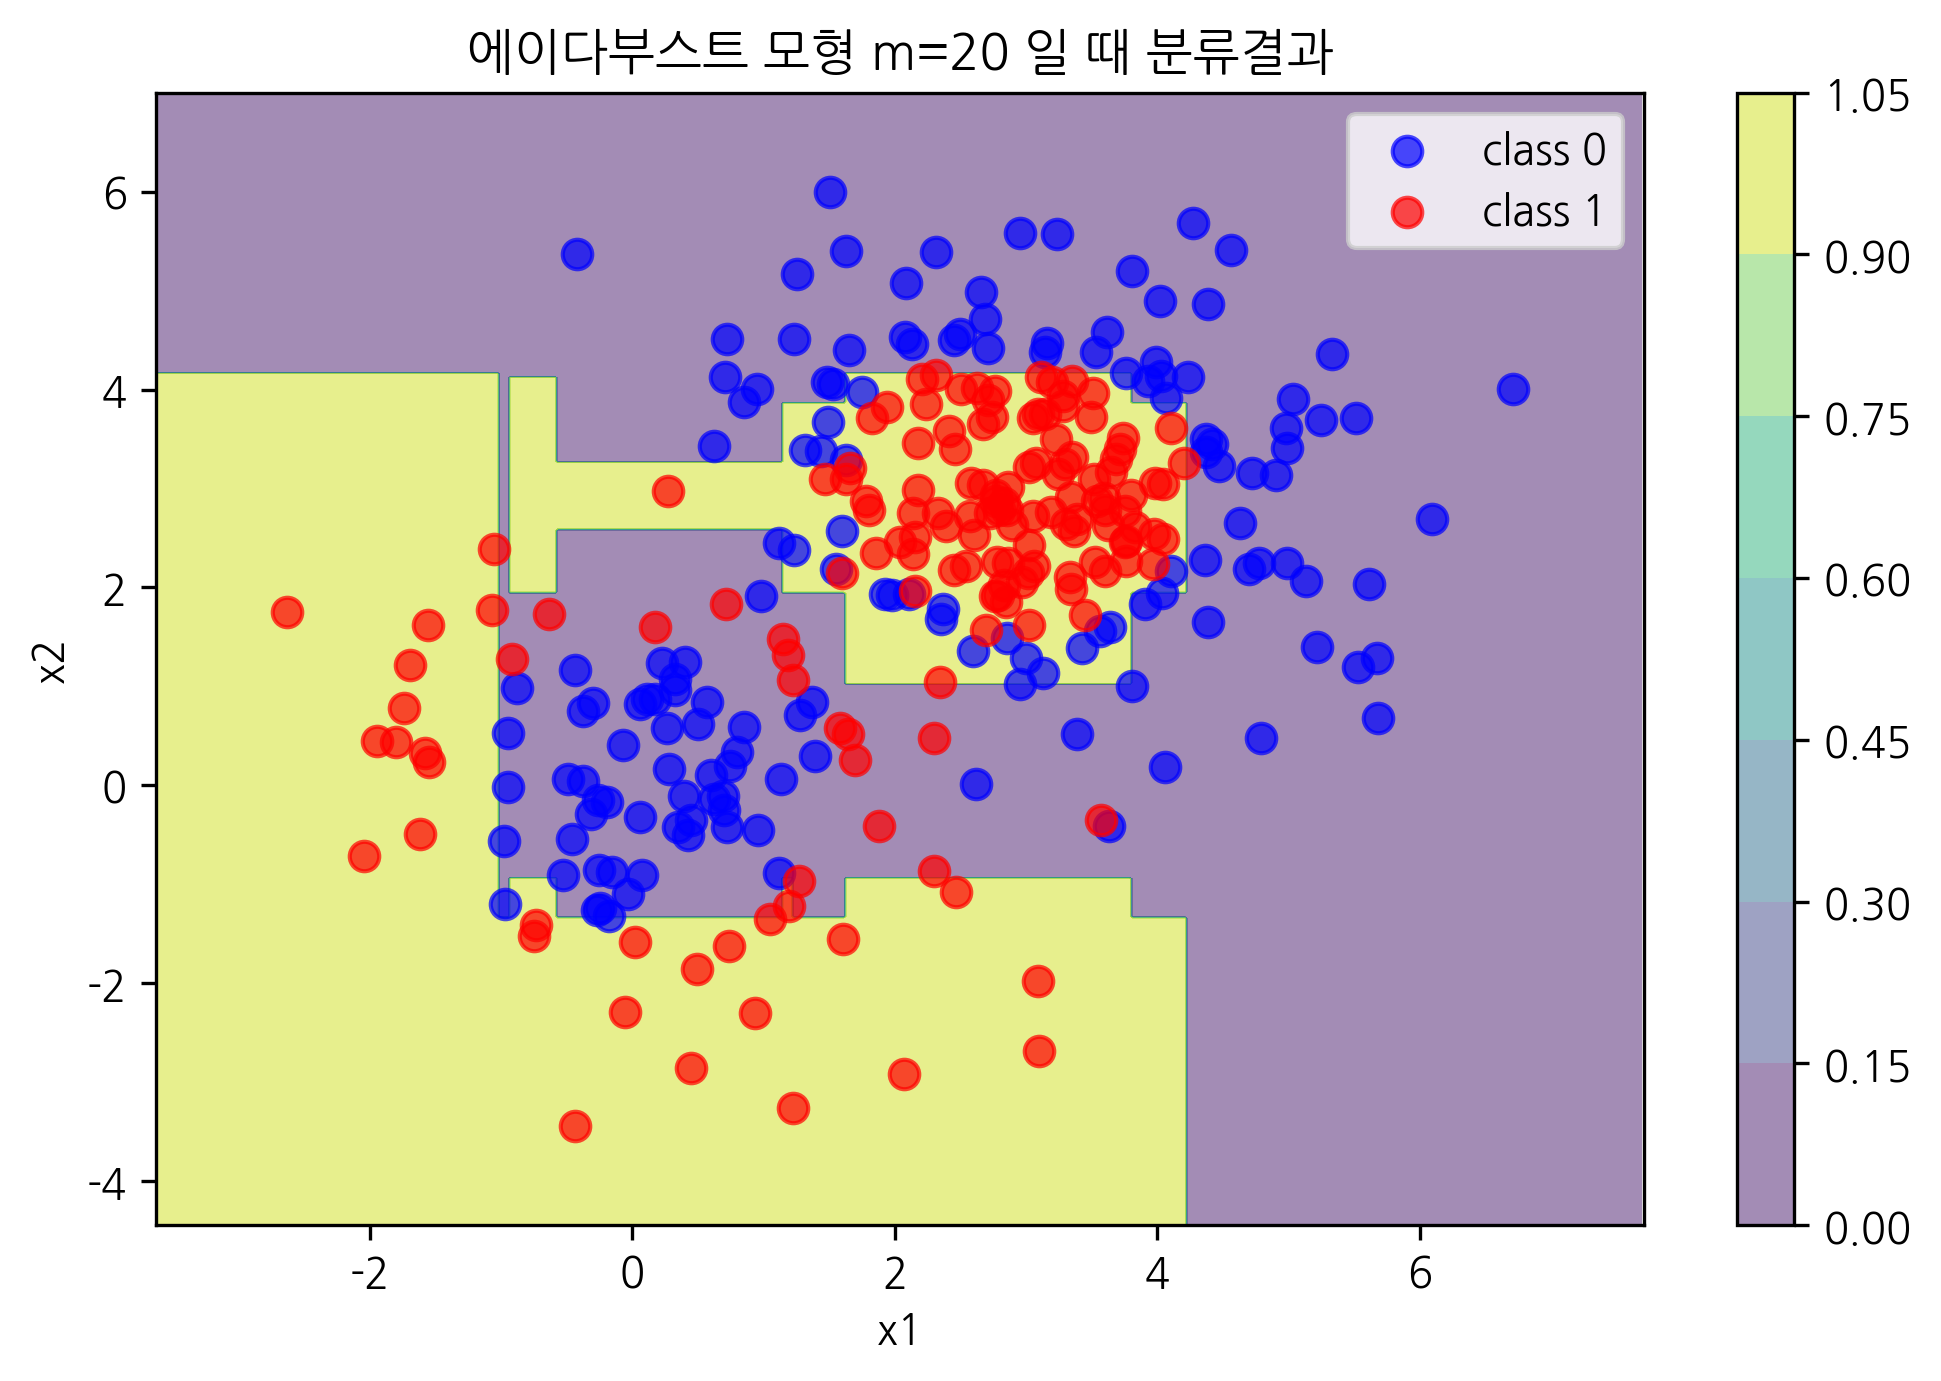

In [30]:
def plot_result(model, legend=False, s=50, title='분류결과') : 
    x1_min, x1_max = X[:,0].min() - 1 , X[:,0].max() + 1 # 입력행렬 X의 X 축 최솟값 & 최댓값
    x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1 # 입력행렬 X 의 Y 축 최솟값 & 최댓값 

    # x 축 최소 최대, y축 최소 최대 이용해서 정사각형 좌표 생성 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))  # xx1 = 정사각형 x 좌표, xx2 = 정사각형 y 좌표 
    
    # 정사각형 2차원 평면 위 각 점에 대한 모델의 예측 결과: Y. 1 또는 0이다. 
    Y = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

    # 정사각형 각 위 점에 예측 결과 Y 결합; 3차원 그래프 2차원 평면에 색깔로 표현. 
    cs = plt.contourf(xx1, xx2, Y, alpha=0.5)
    
    # 맨 처음 표본 데이터 그래프에 함께 표현 
    for i, n, c in zip(range(2), '01', 'br') : 
        idx = np.where(y == i) # y 정답값이 i 인 X 행렬 레코드 행. 
        plt.scatter(X[idx, 0], X[idx, 1], c=c, s=s, alpha=0.7, label=f'class {i}')
        
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.colorbar(cs)
    if legend : plt.legend() 
    plt.grid(False)
    plt.show() 
plot_result(model_ada, legend=True, title ='에이다부스트 모형 m=20 일 때 분류결과' )

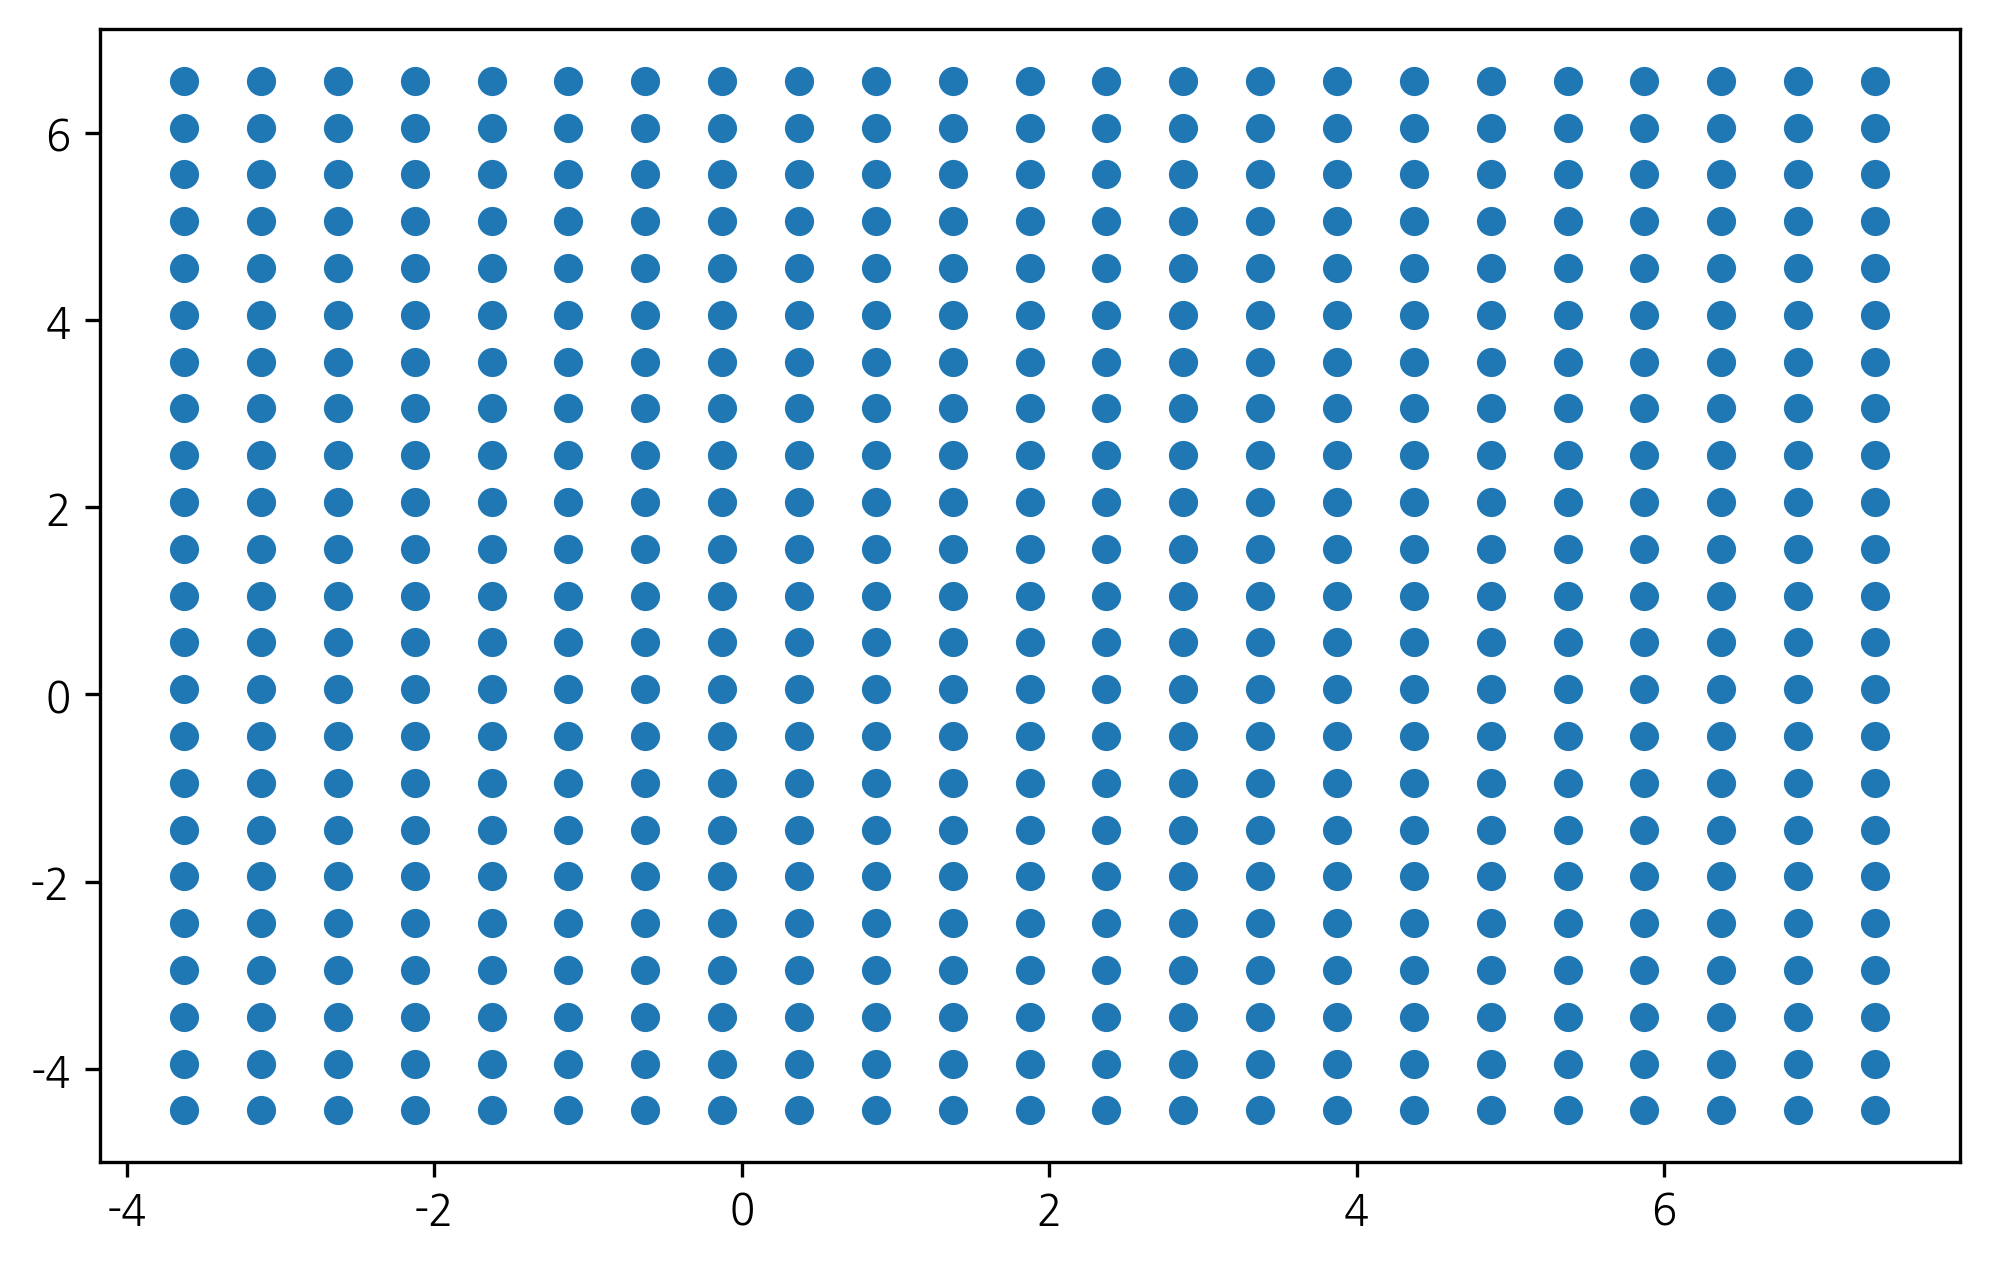

In [31]:
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,0.5), np.arange(x2_min, x2_max, 0.5))

plt.scatter(xx1, xx2)

In [32]:
def plot_result2(model, legend=False, s=50, title='분류결과') : 
    x1_min, x1_max = X[:,0].min() - 1 , X[:,0].max() + 1 # 입력행렬 X의 X 축 최솟값 & 최댓값
    x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1 # 입력행렬 X 의 Y 축 최솟값 & 최댓값 

    # x 축 최소 최대, y축 최소 최대 이용해서 정사각형 좌표 생성 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))  # xx1 = 정사각형 x 좌표, xx2 = 정사각형 y 좌표 
    
    # 정사각형 2차원 평면 위 각 점에 대한 모델의 예측 결과: Y. 1 또는 0이다. 
    Y = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

    # 정사각형 각 위 점에 예측 결과 Y 결합; 3차원 그래프 2차원 평면에 색깔로 표현. 
    cs = plt.contourf(xx1, xx2, Y, alpha=0.5)
    
    # 맨 처음 표본 데이터 그래프에 함께 표현 
    for i, n, c in zip(range(2), '01', 'br') : 
        idx = np.where(y == i) # y 정답값이 i 인 X 행렬 레코드 행. 
        plt.scatter(X[idx, 0], X[idx, 1], c=c, s=s[idx], alpha=0.7, label=f'class {i}')
        
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.colorbar(cs)
    if legend : plt.legend() 
    plt.grid(False)
    plt.show() 

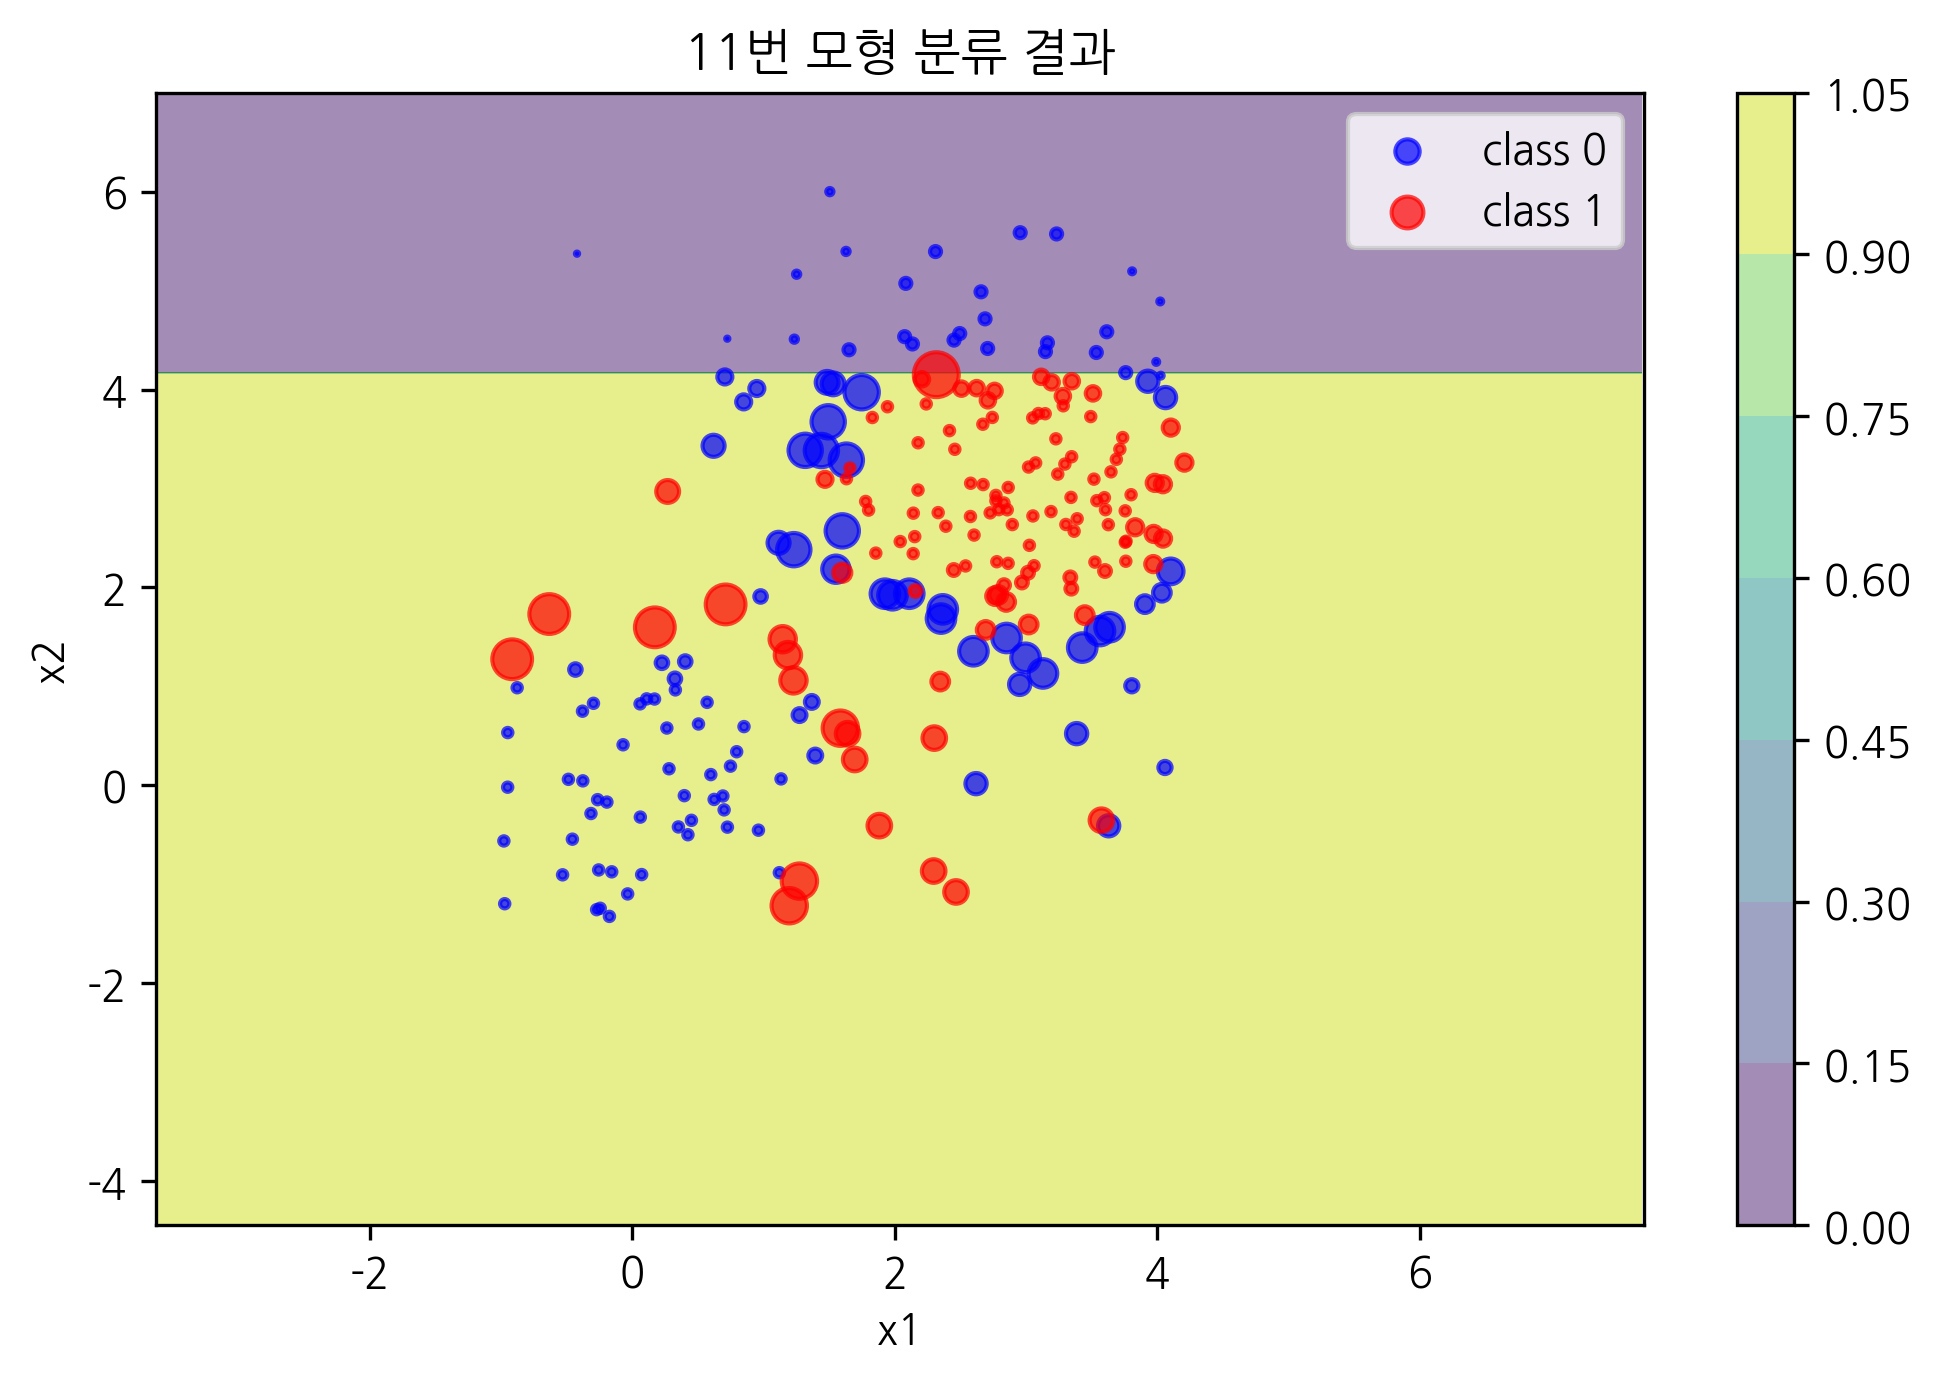

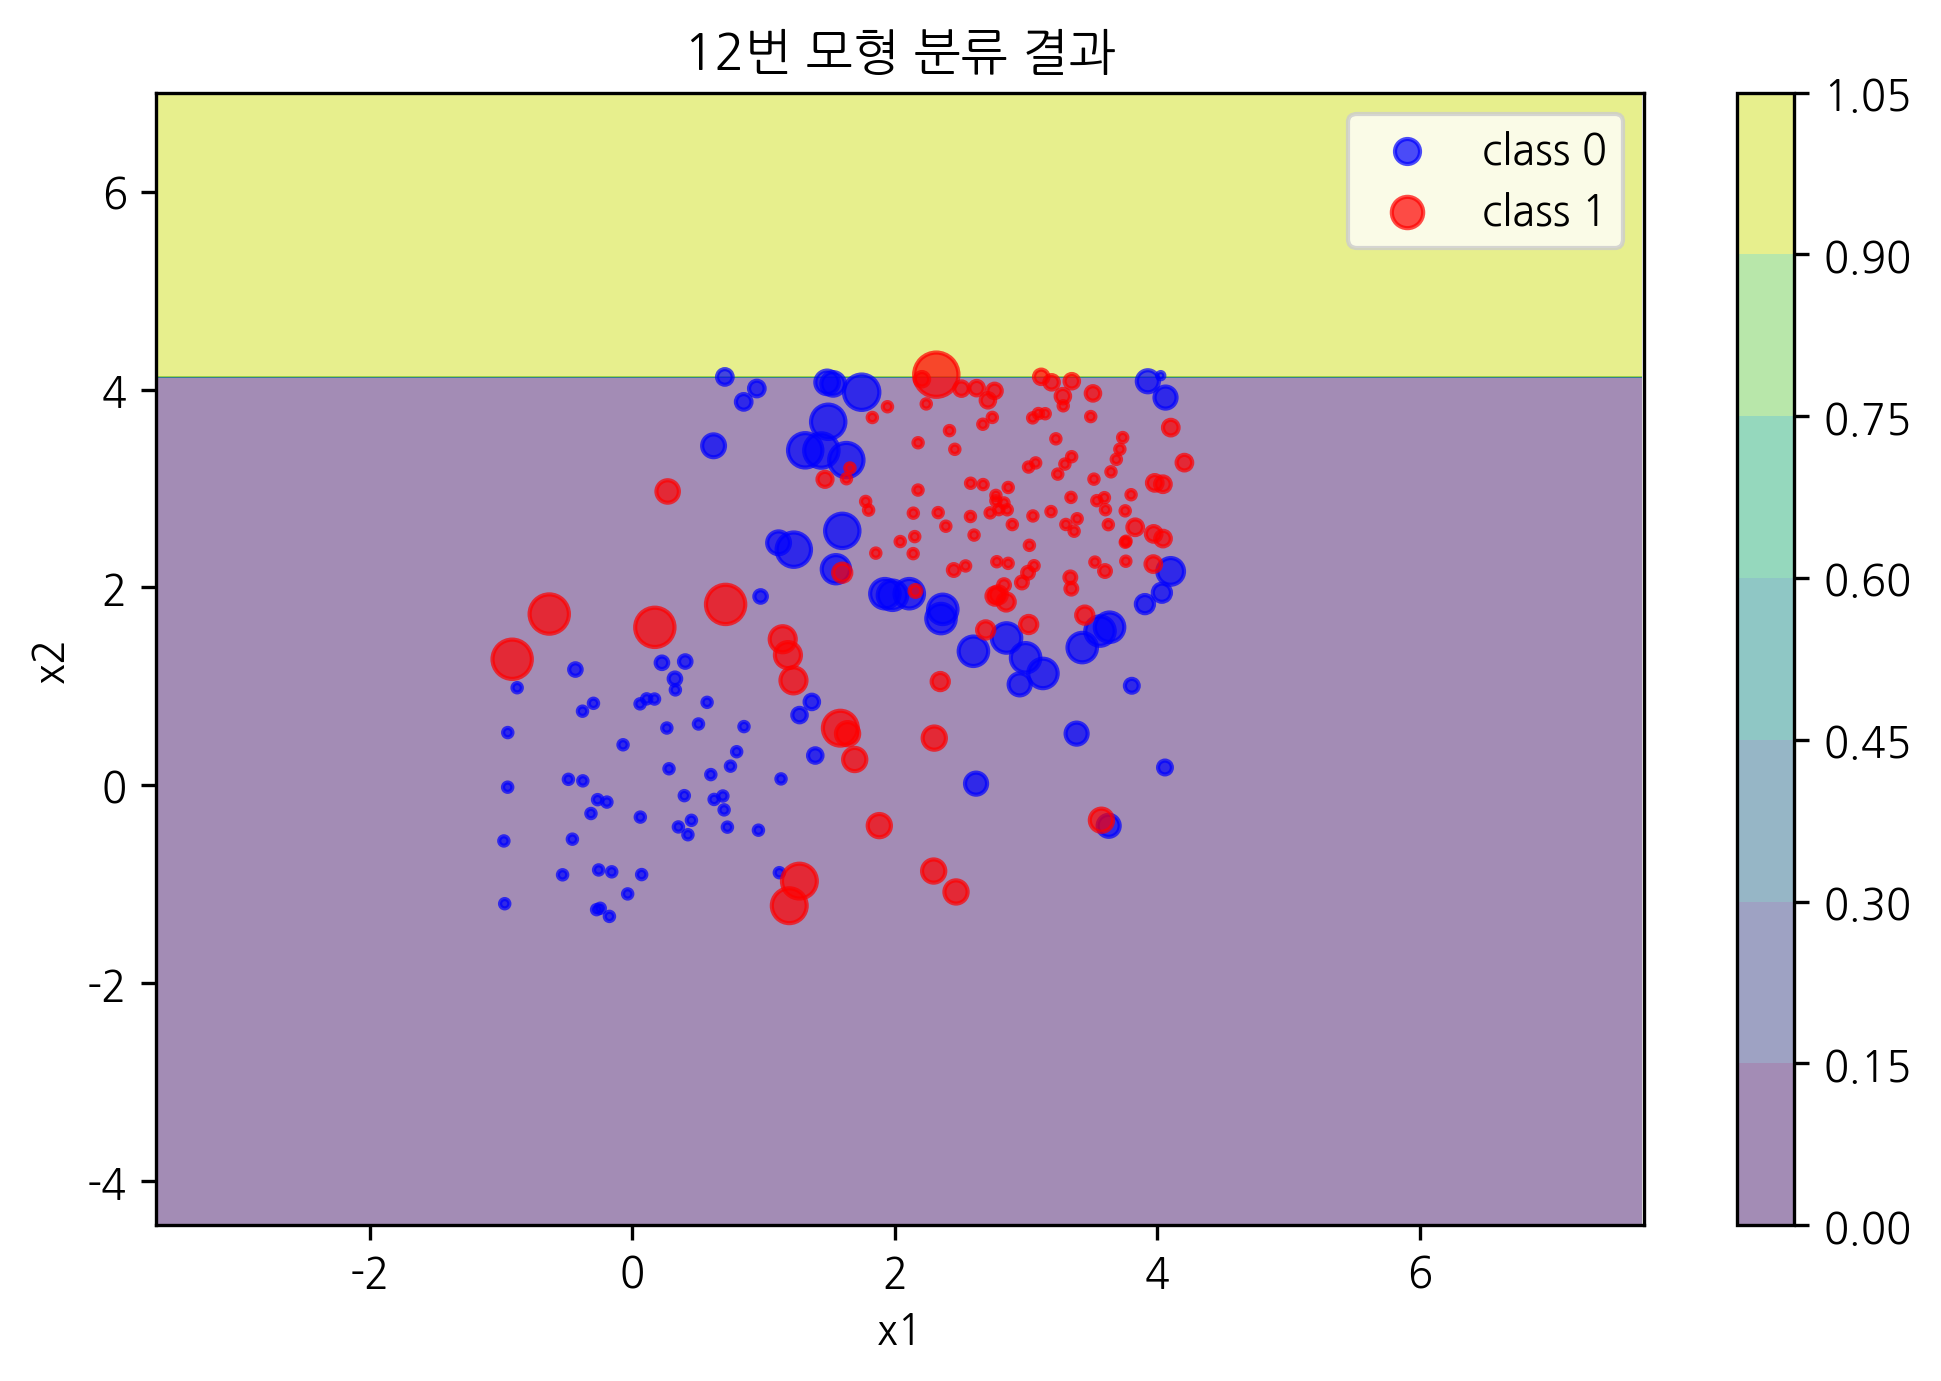

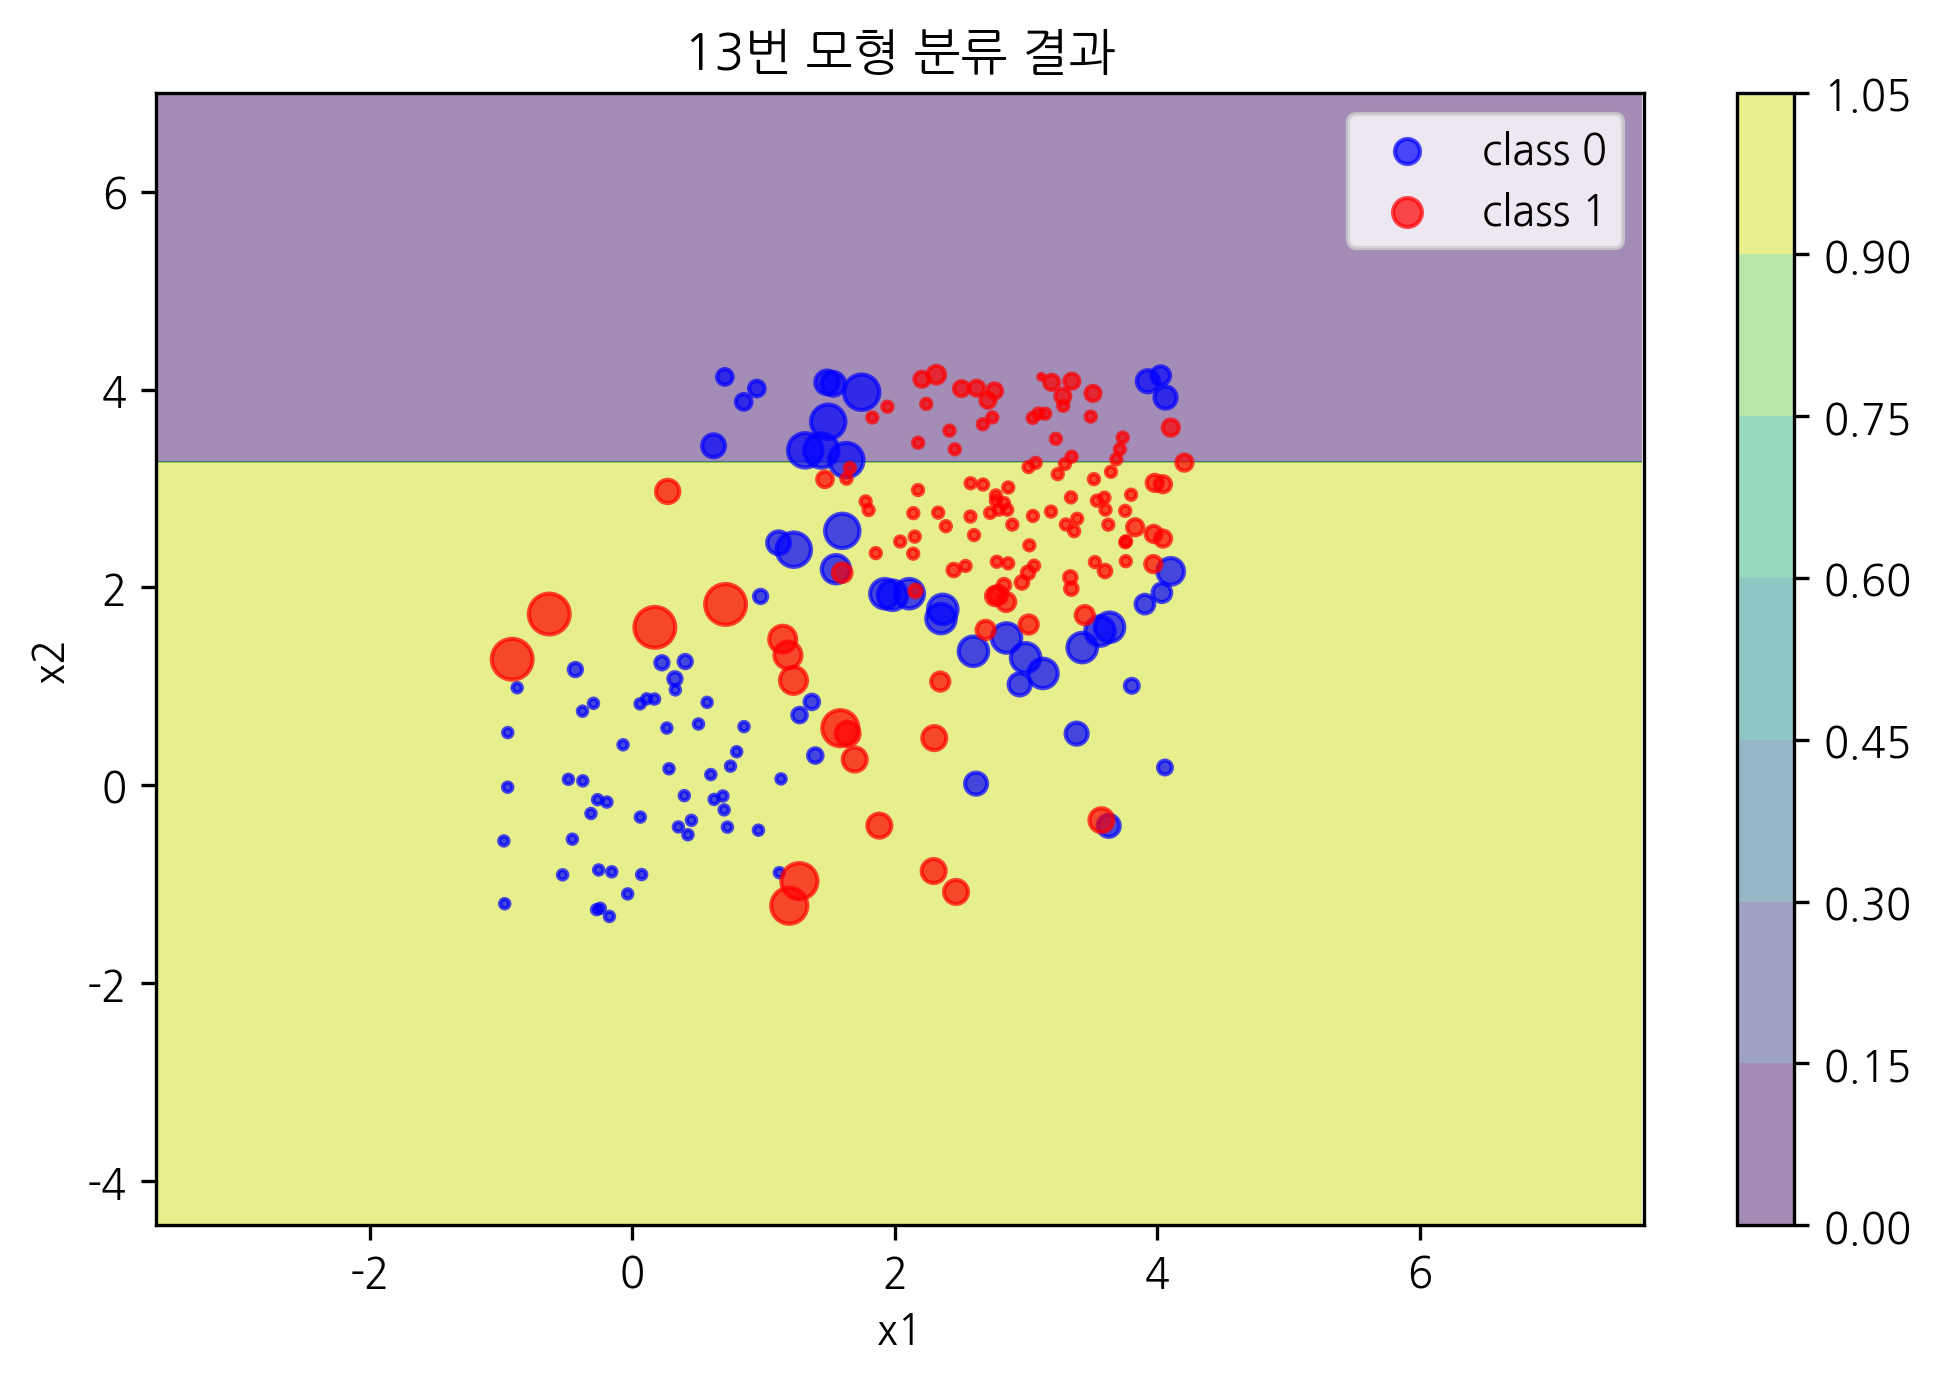

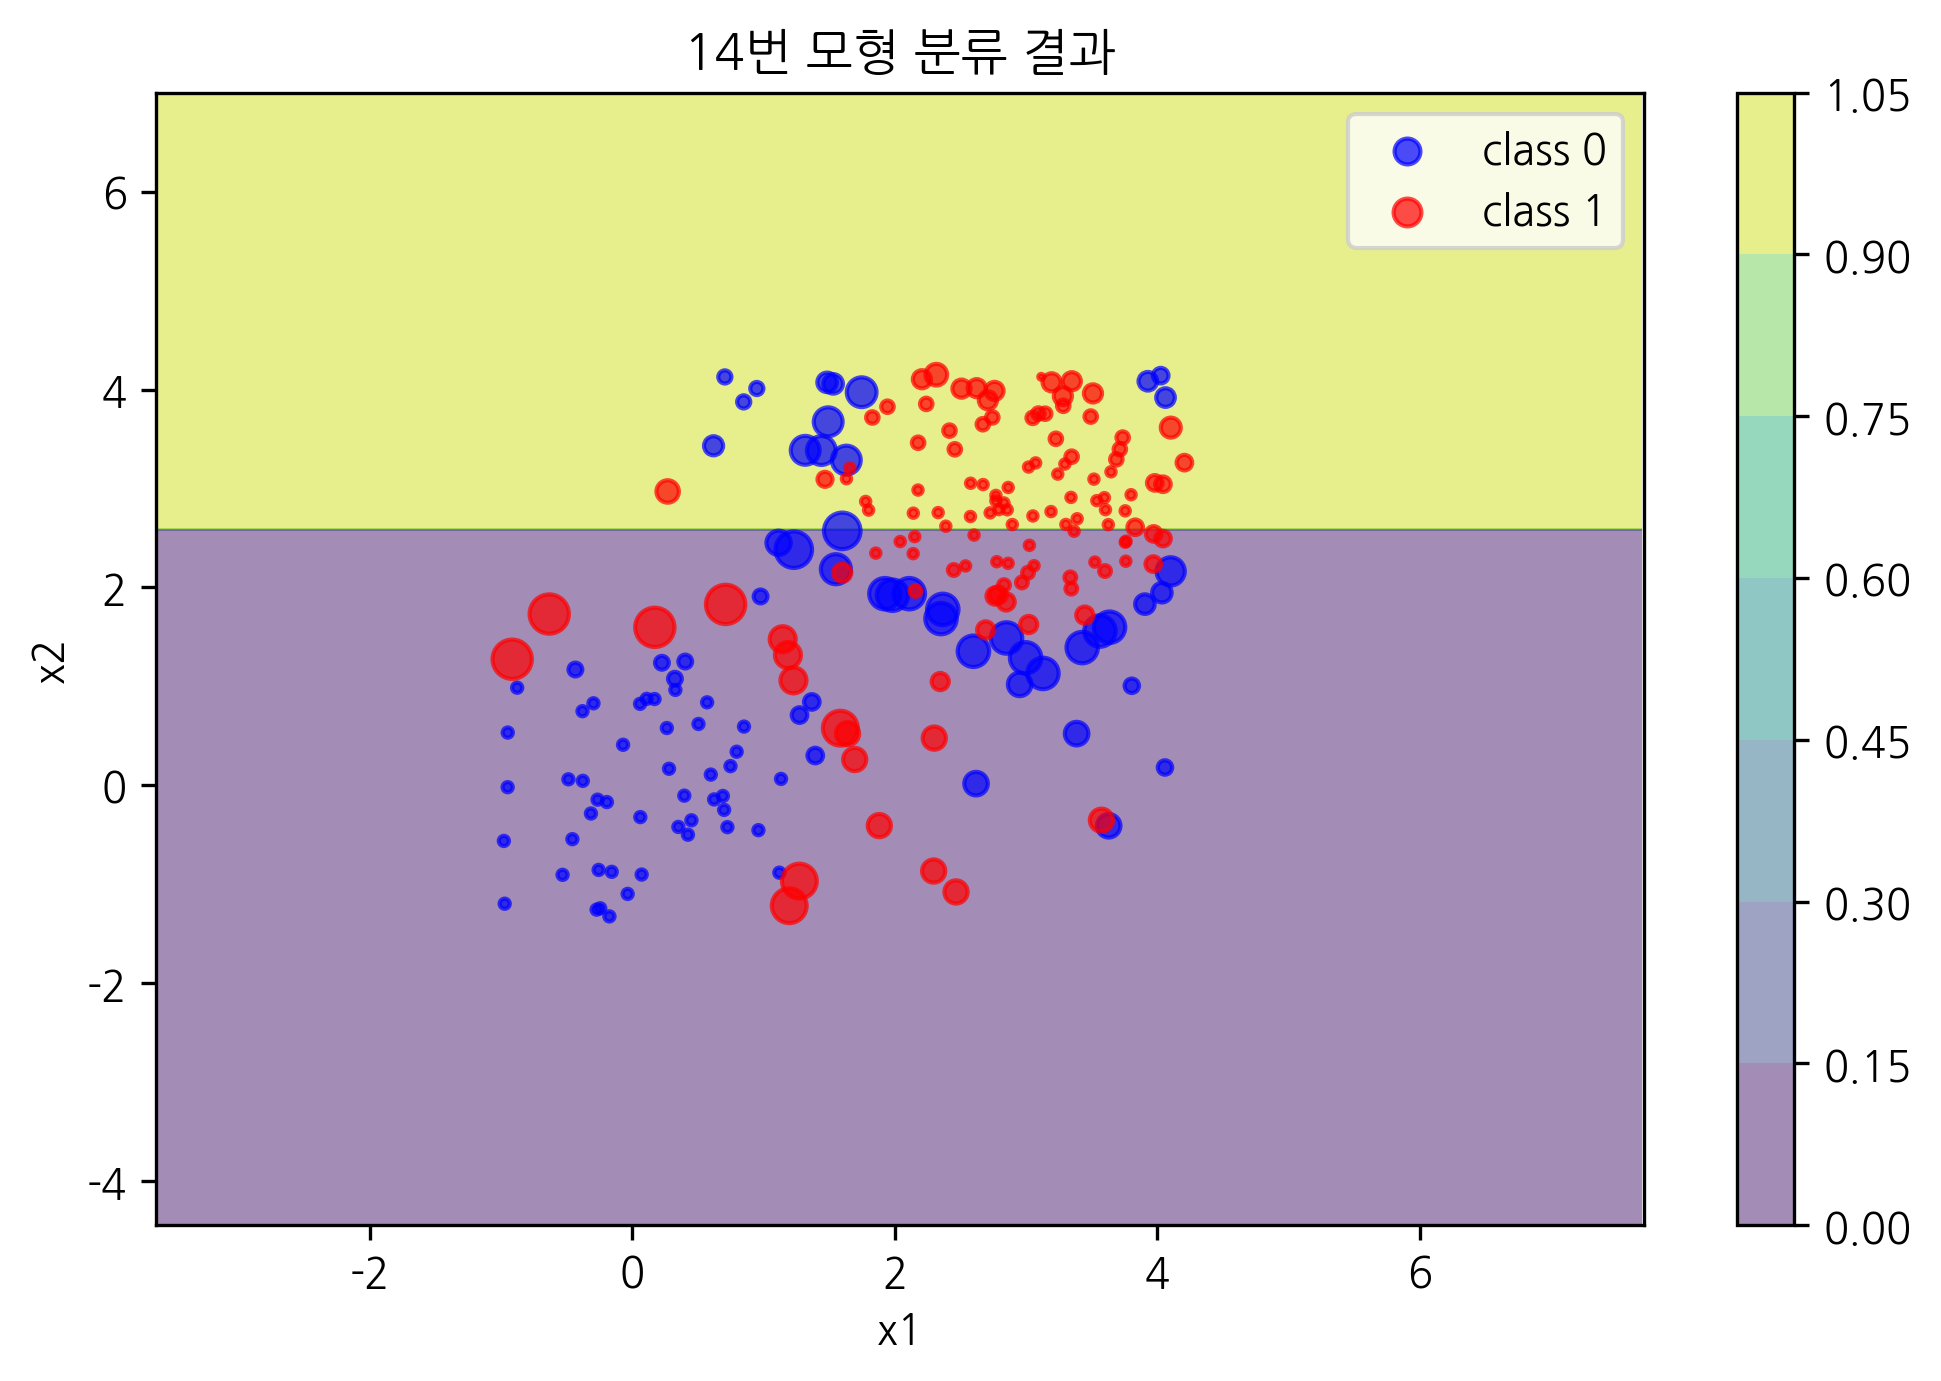

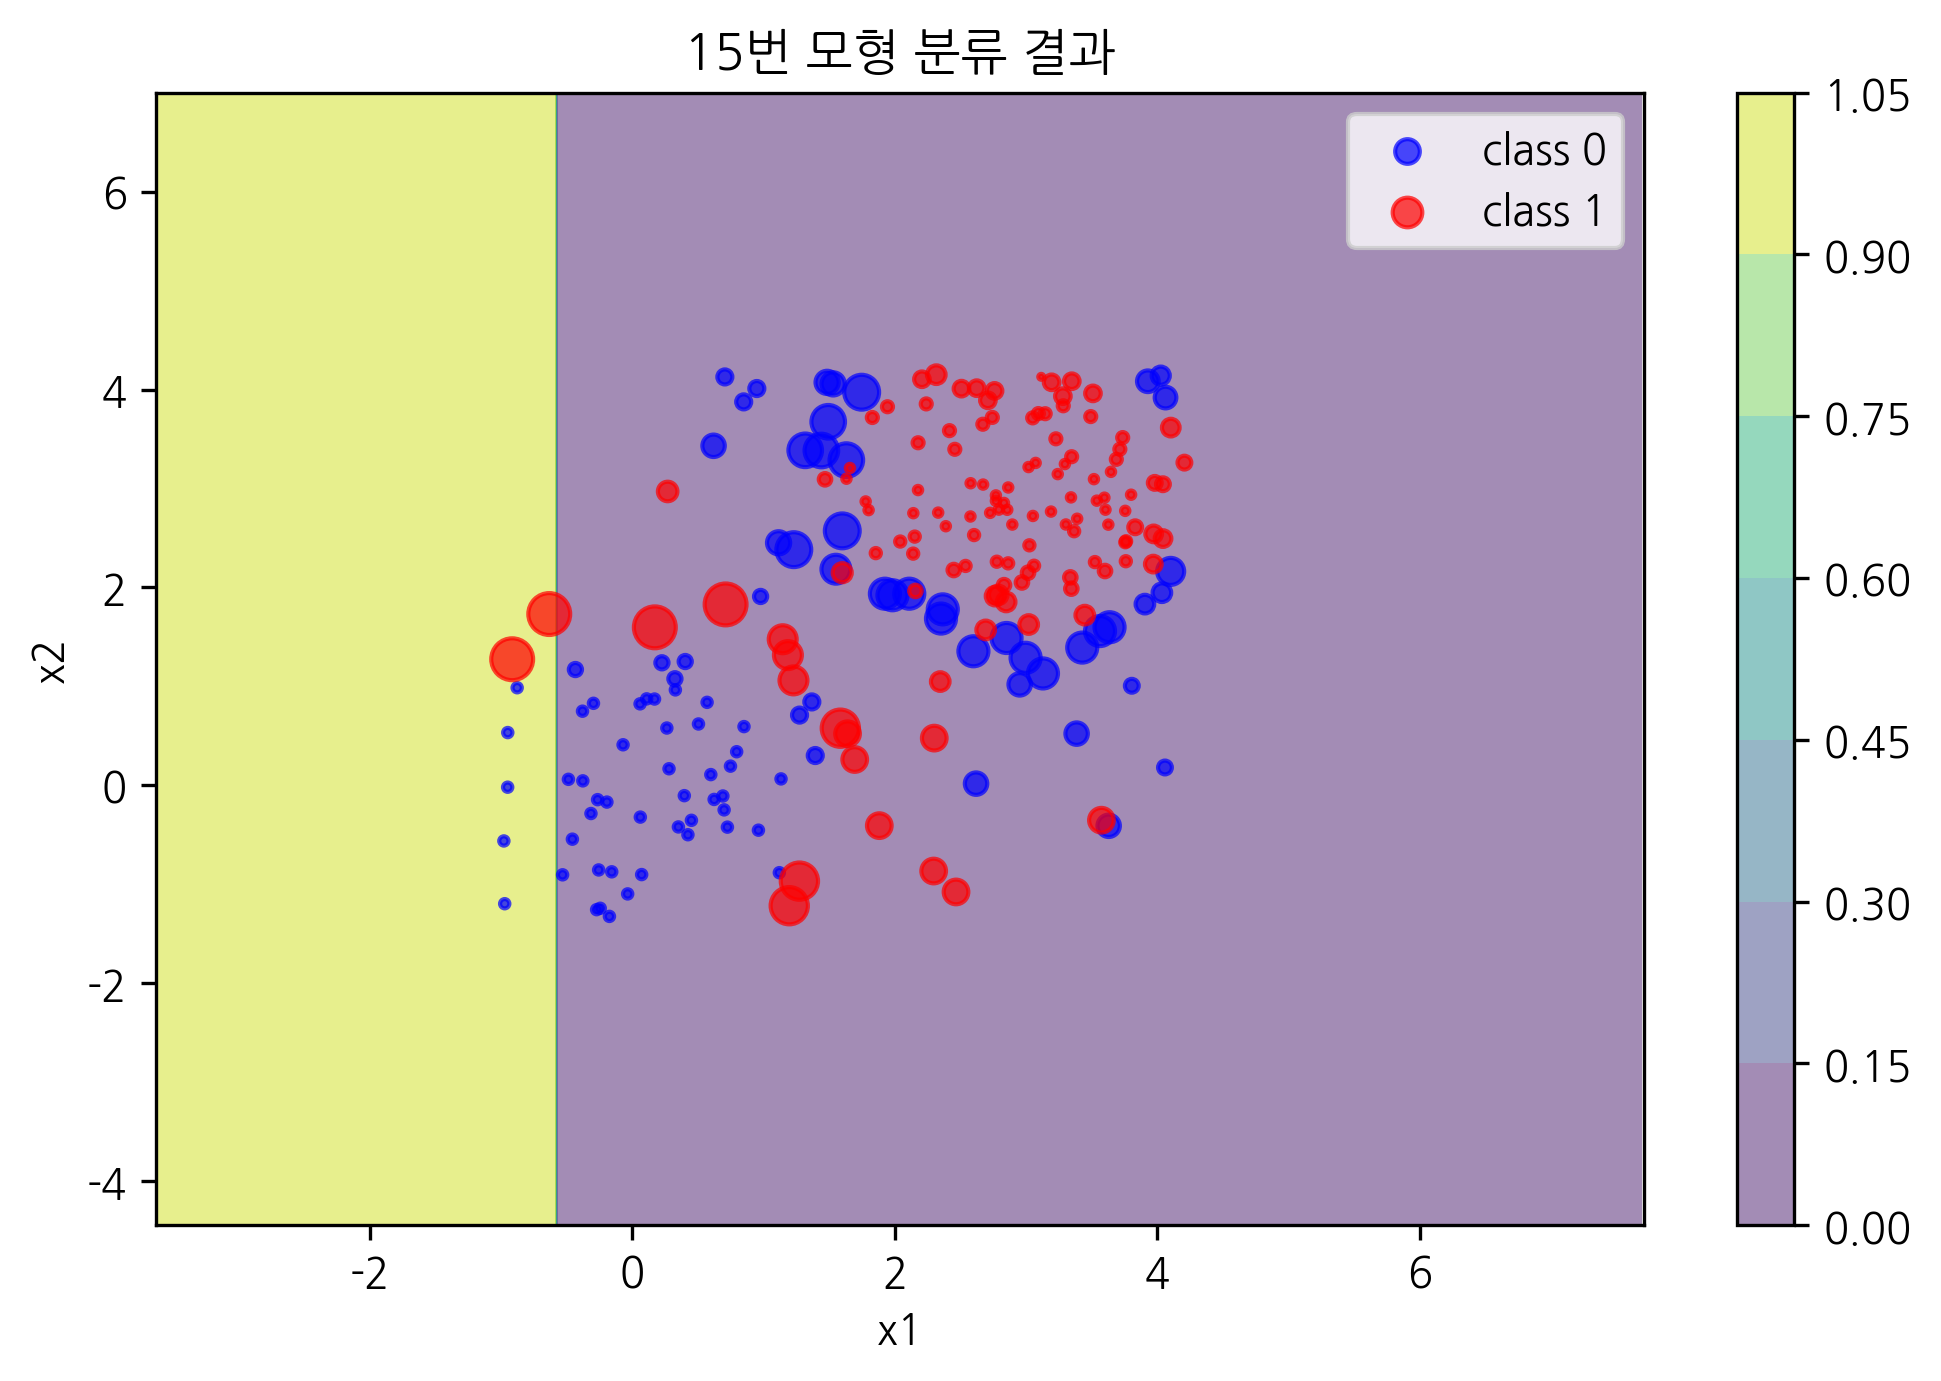

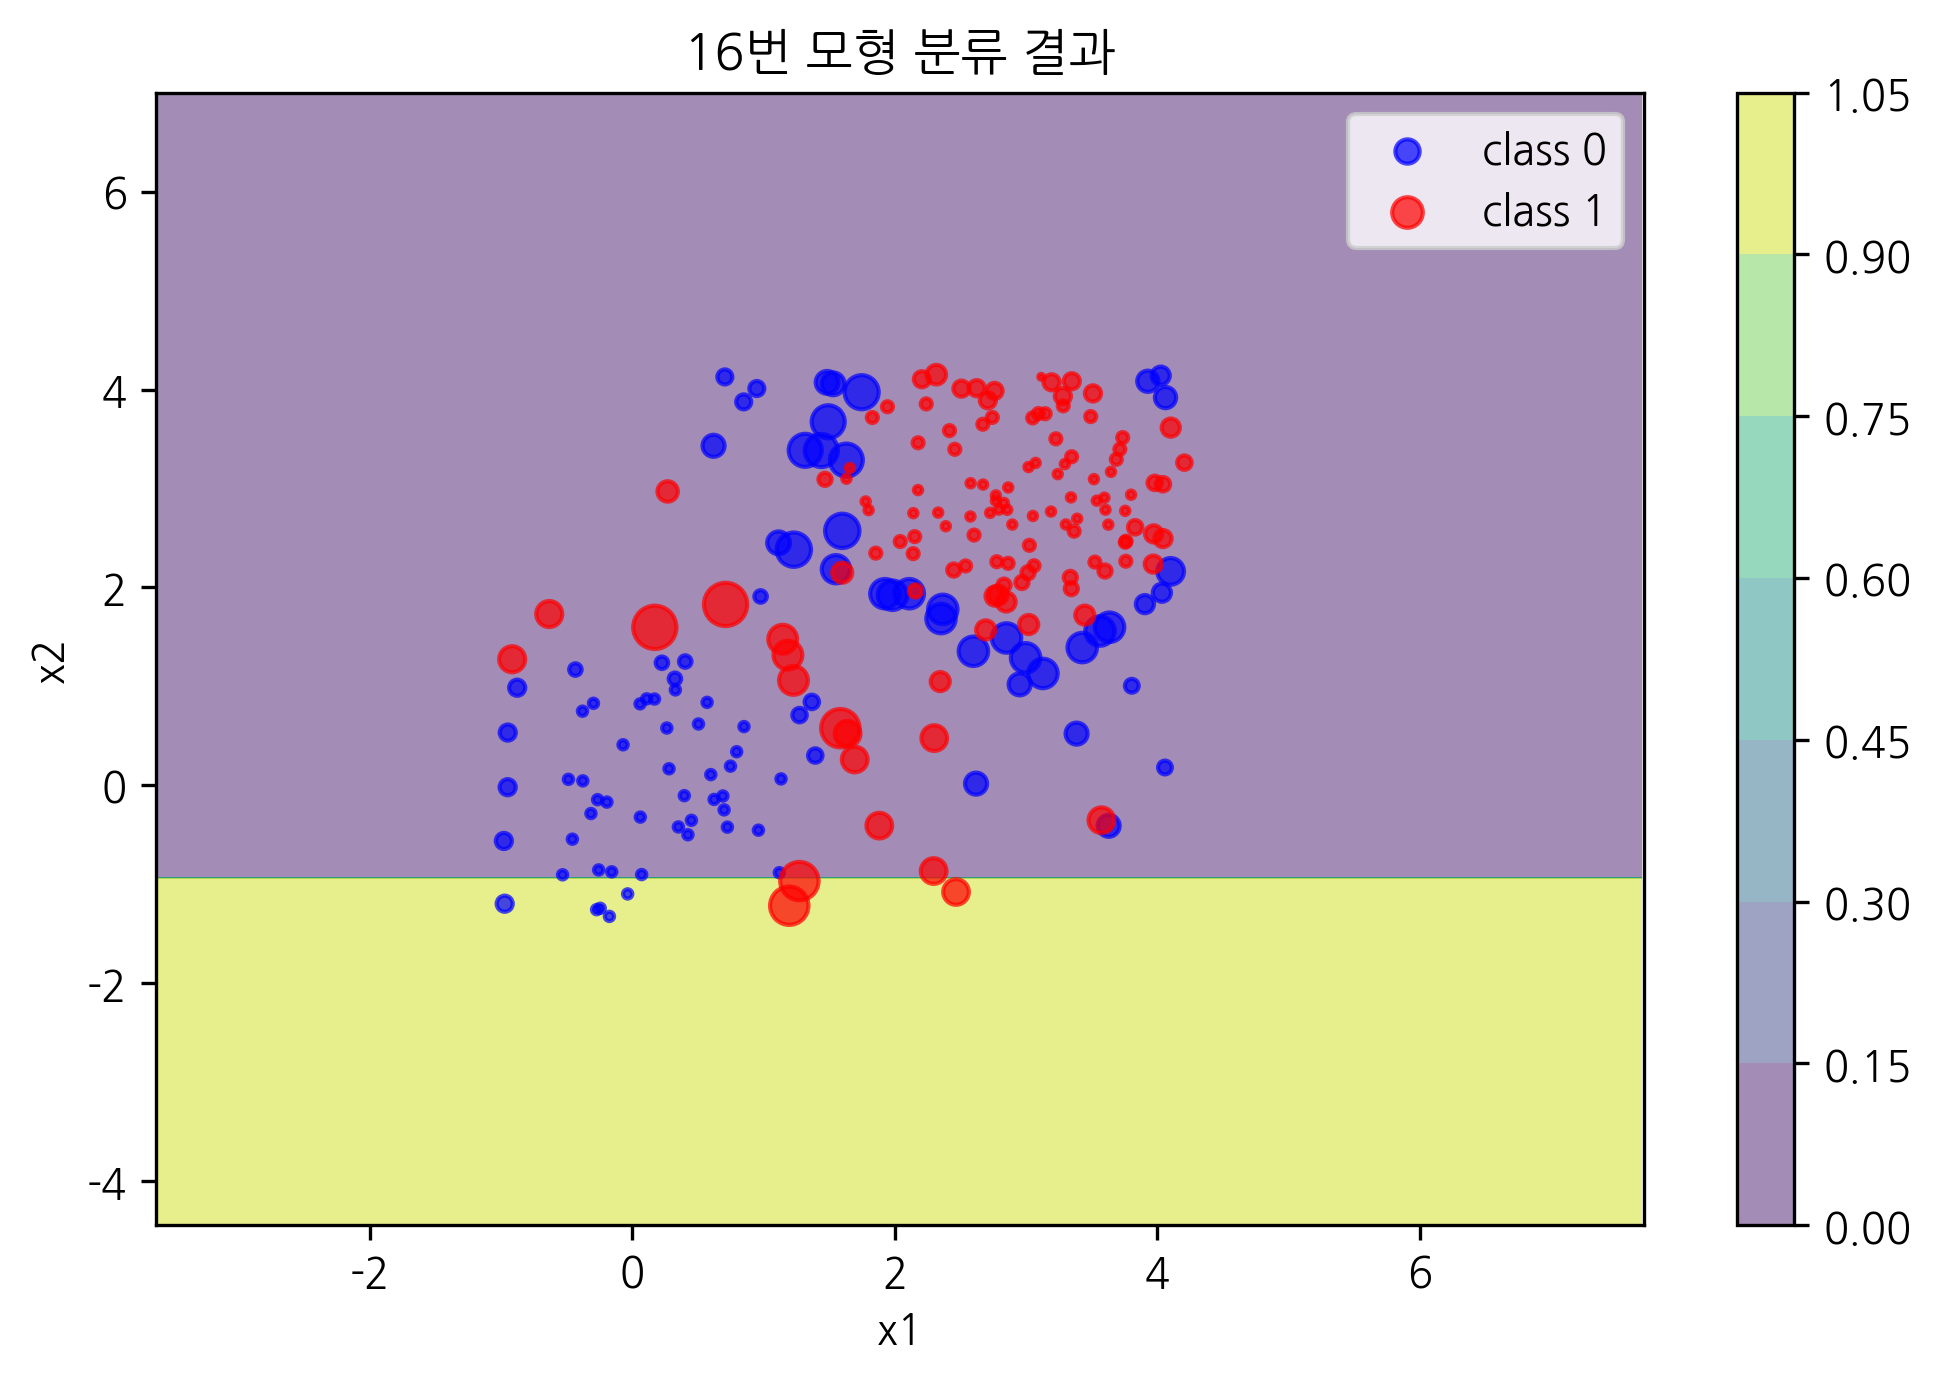

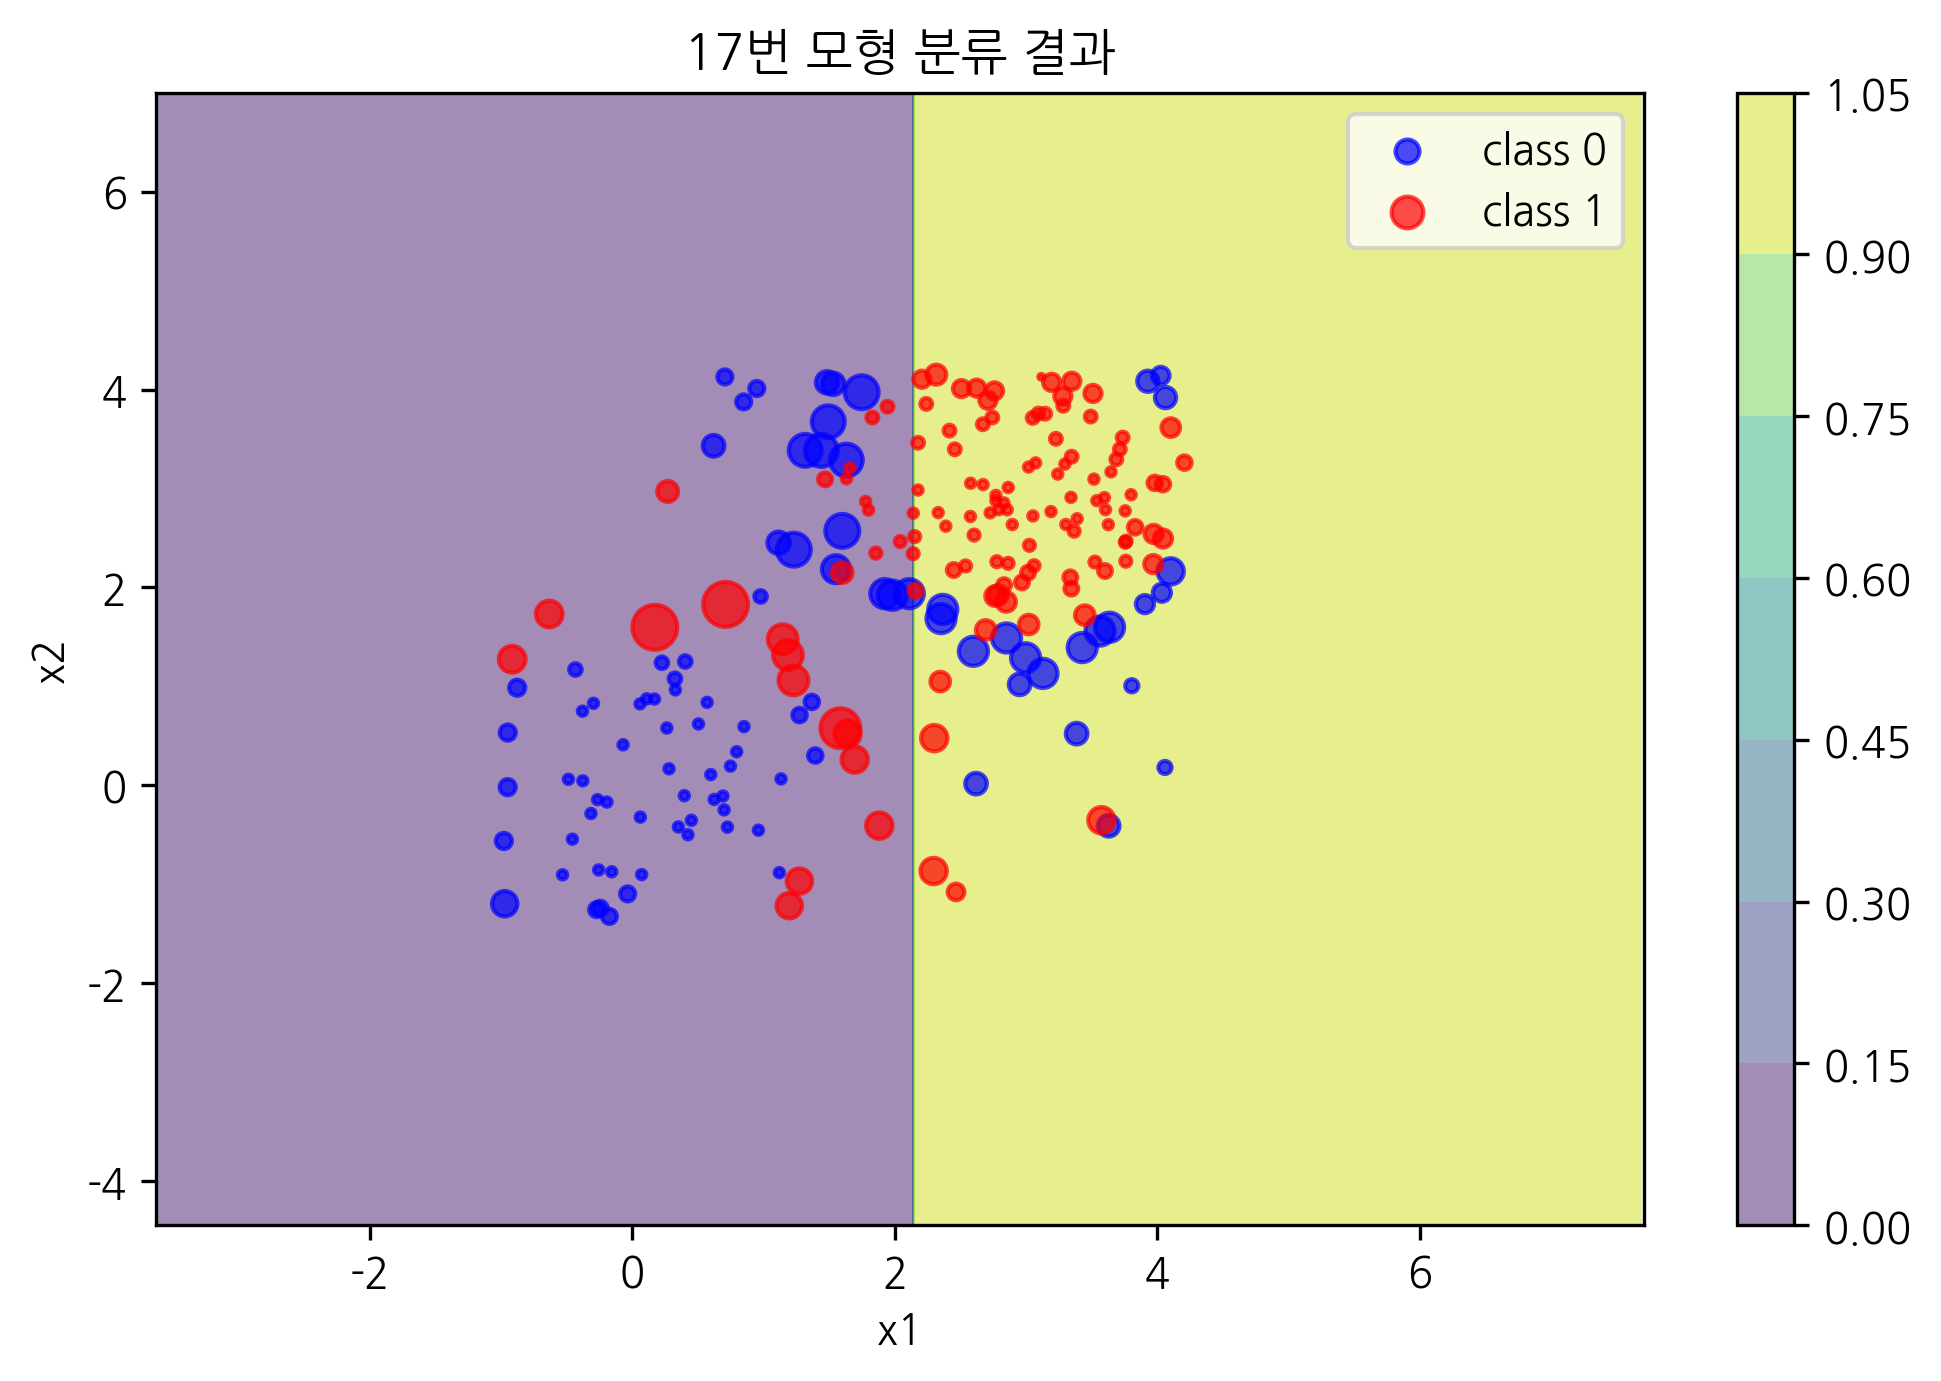

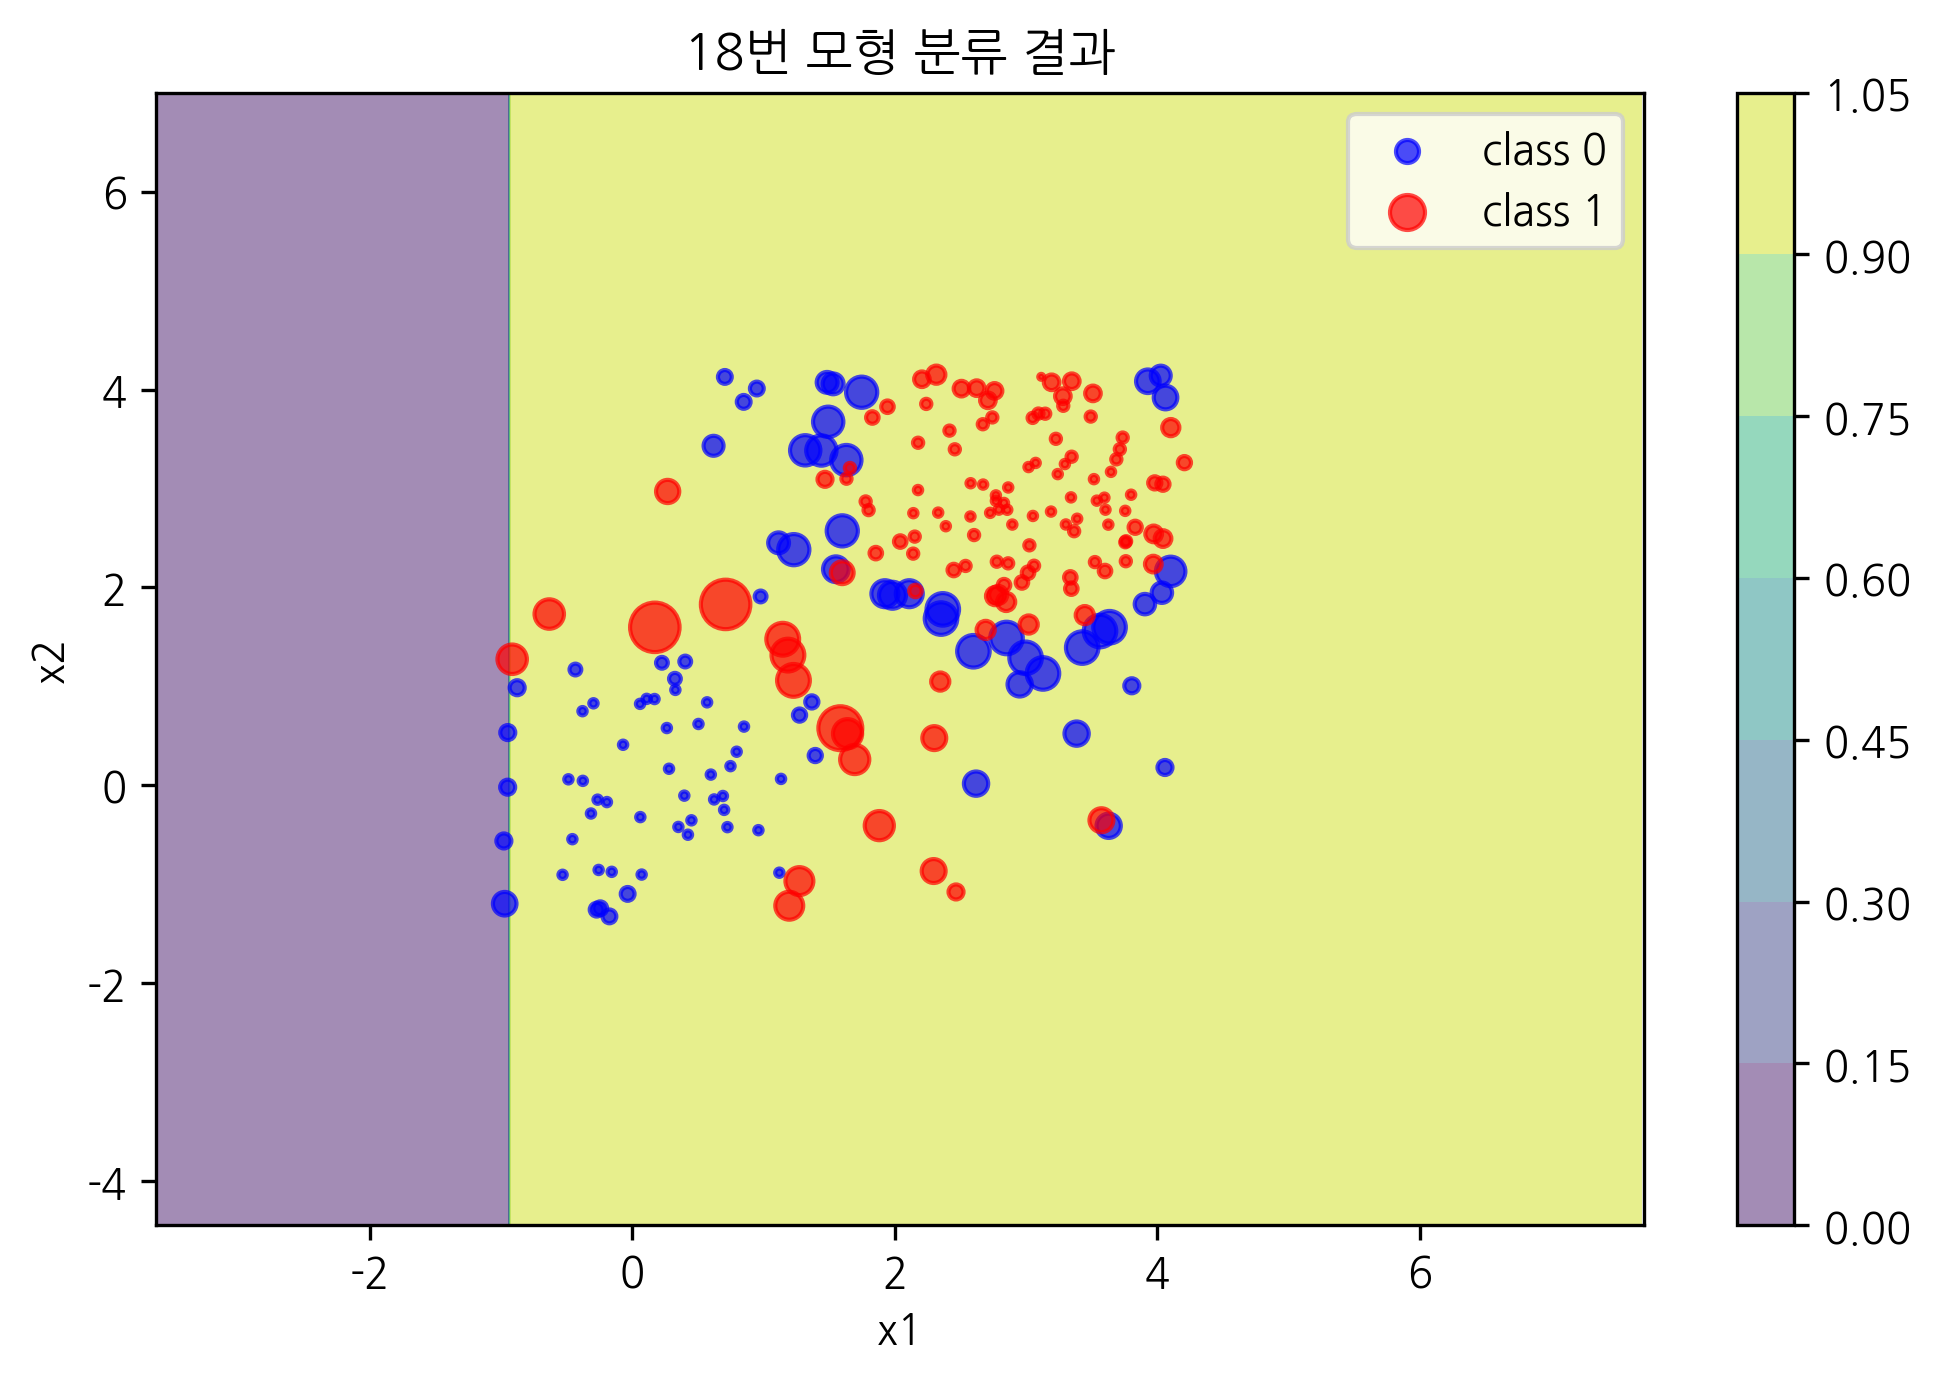

In [48]:
for i in range(11, 19) : 
    plot_result2(model_ada.estimators_[i], legend=True, s=(4000*model_ada.sample_weight[i-1]).astype(int), title=f'{i}번 모형 분류 결과')


## 모델들이 잘 틀리는 데이터 일 수록 점 크기 크다. 

In [59]:
%%time 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

train_acc = []
test_acc = []
for n in range(1, 1101, 100) : 
    model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=n).fit(x_train, y_train)

    train_acc.append(accuracy_score(y_train, model.predict(x_train))) 
    test_acc.append(cross_val_score(model, x_test, y_test, cv=5).mean()) 

CPU times: user 12.5 s, sys: 68.7 ms, total: 12.6 s
Wall time: 12.6 s


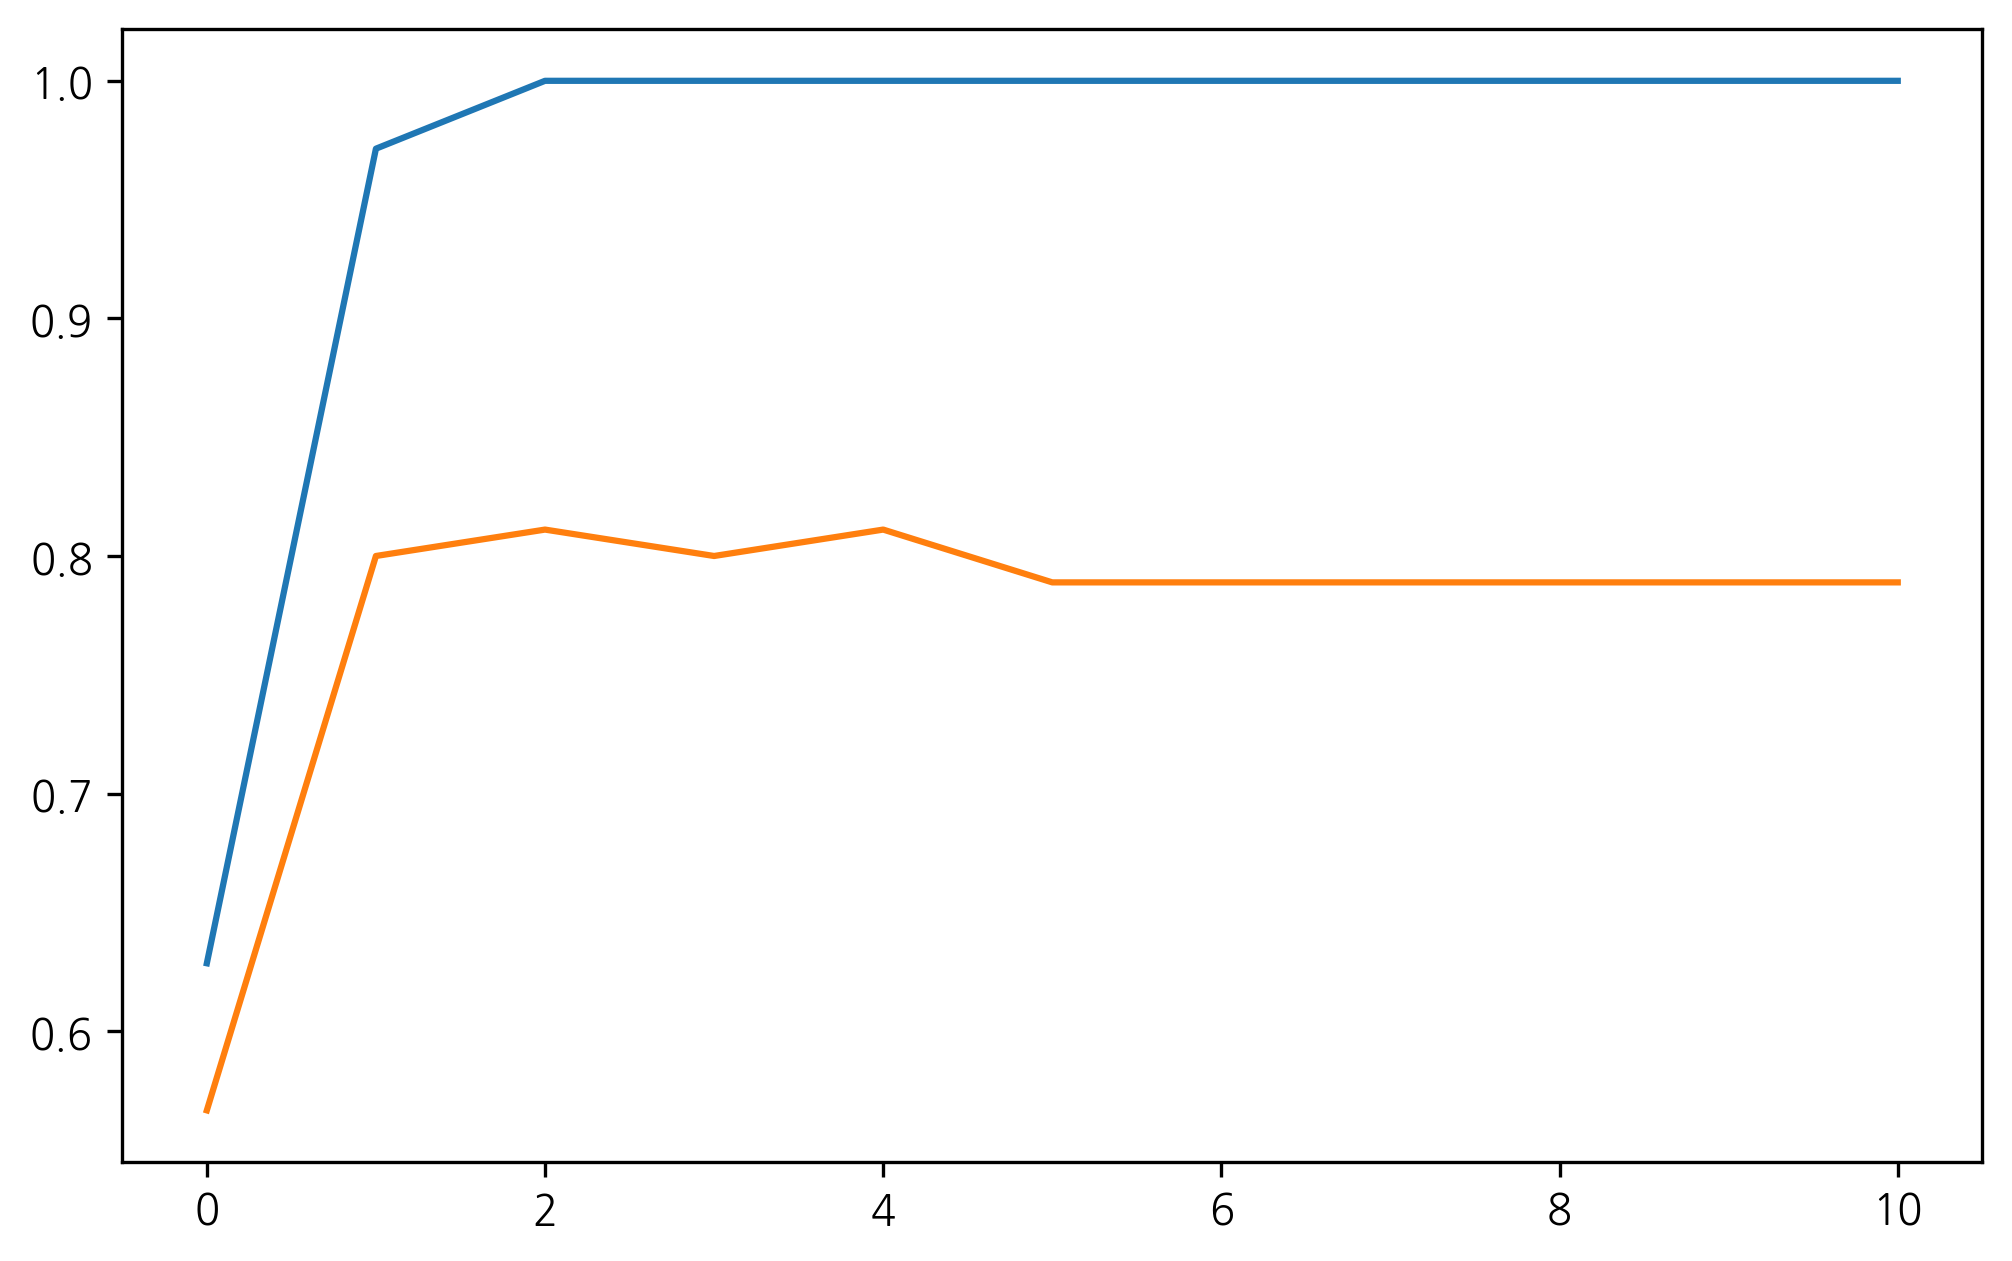

In [60]:
plt.plot(range(len(range(1, 1101, 100))), train_acc)
plt.plot(range(len(range(1, 1101, 100))), test_acc)

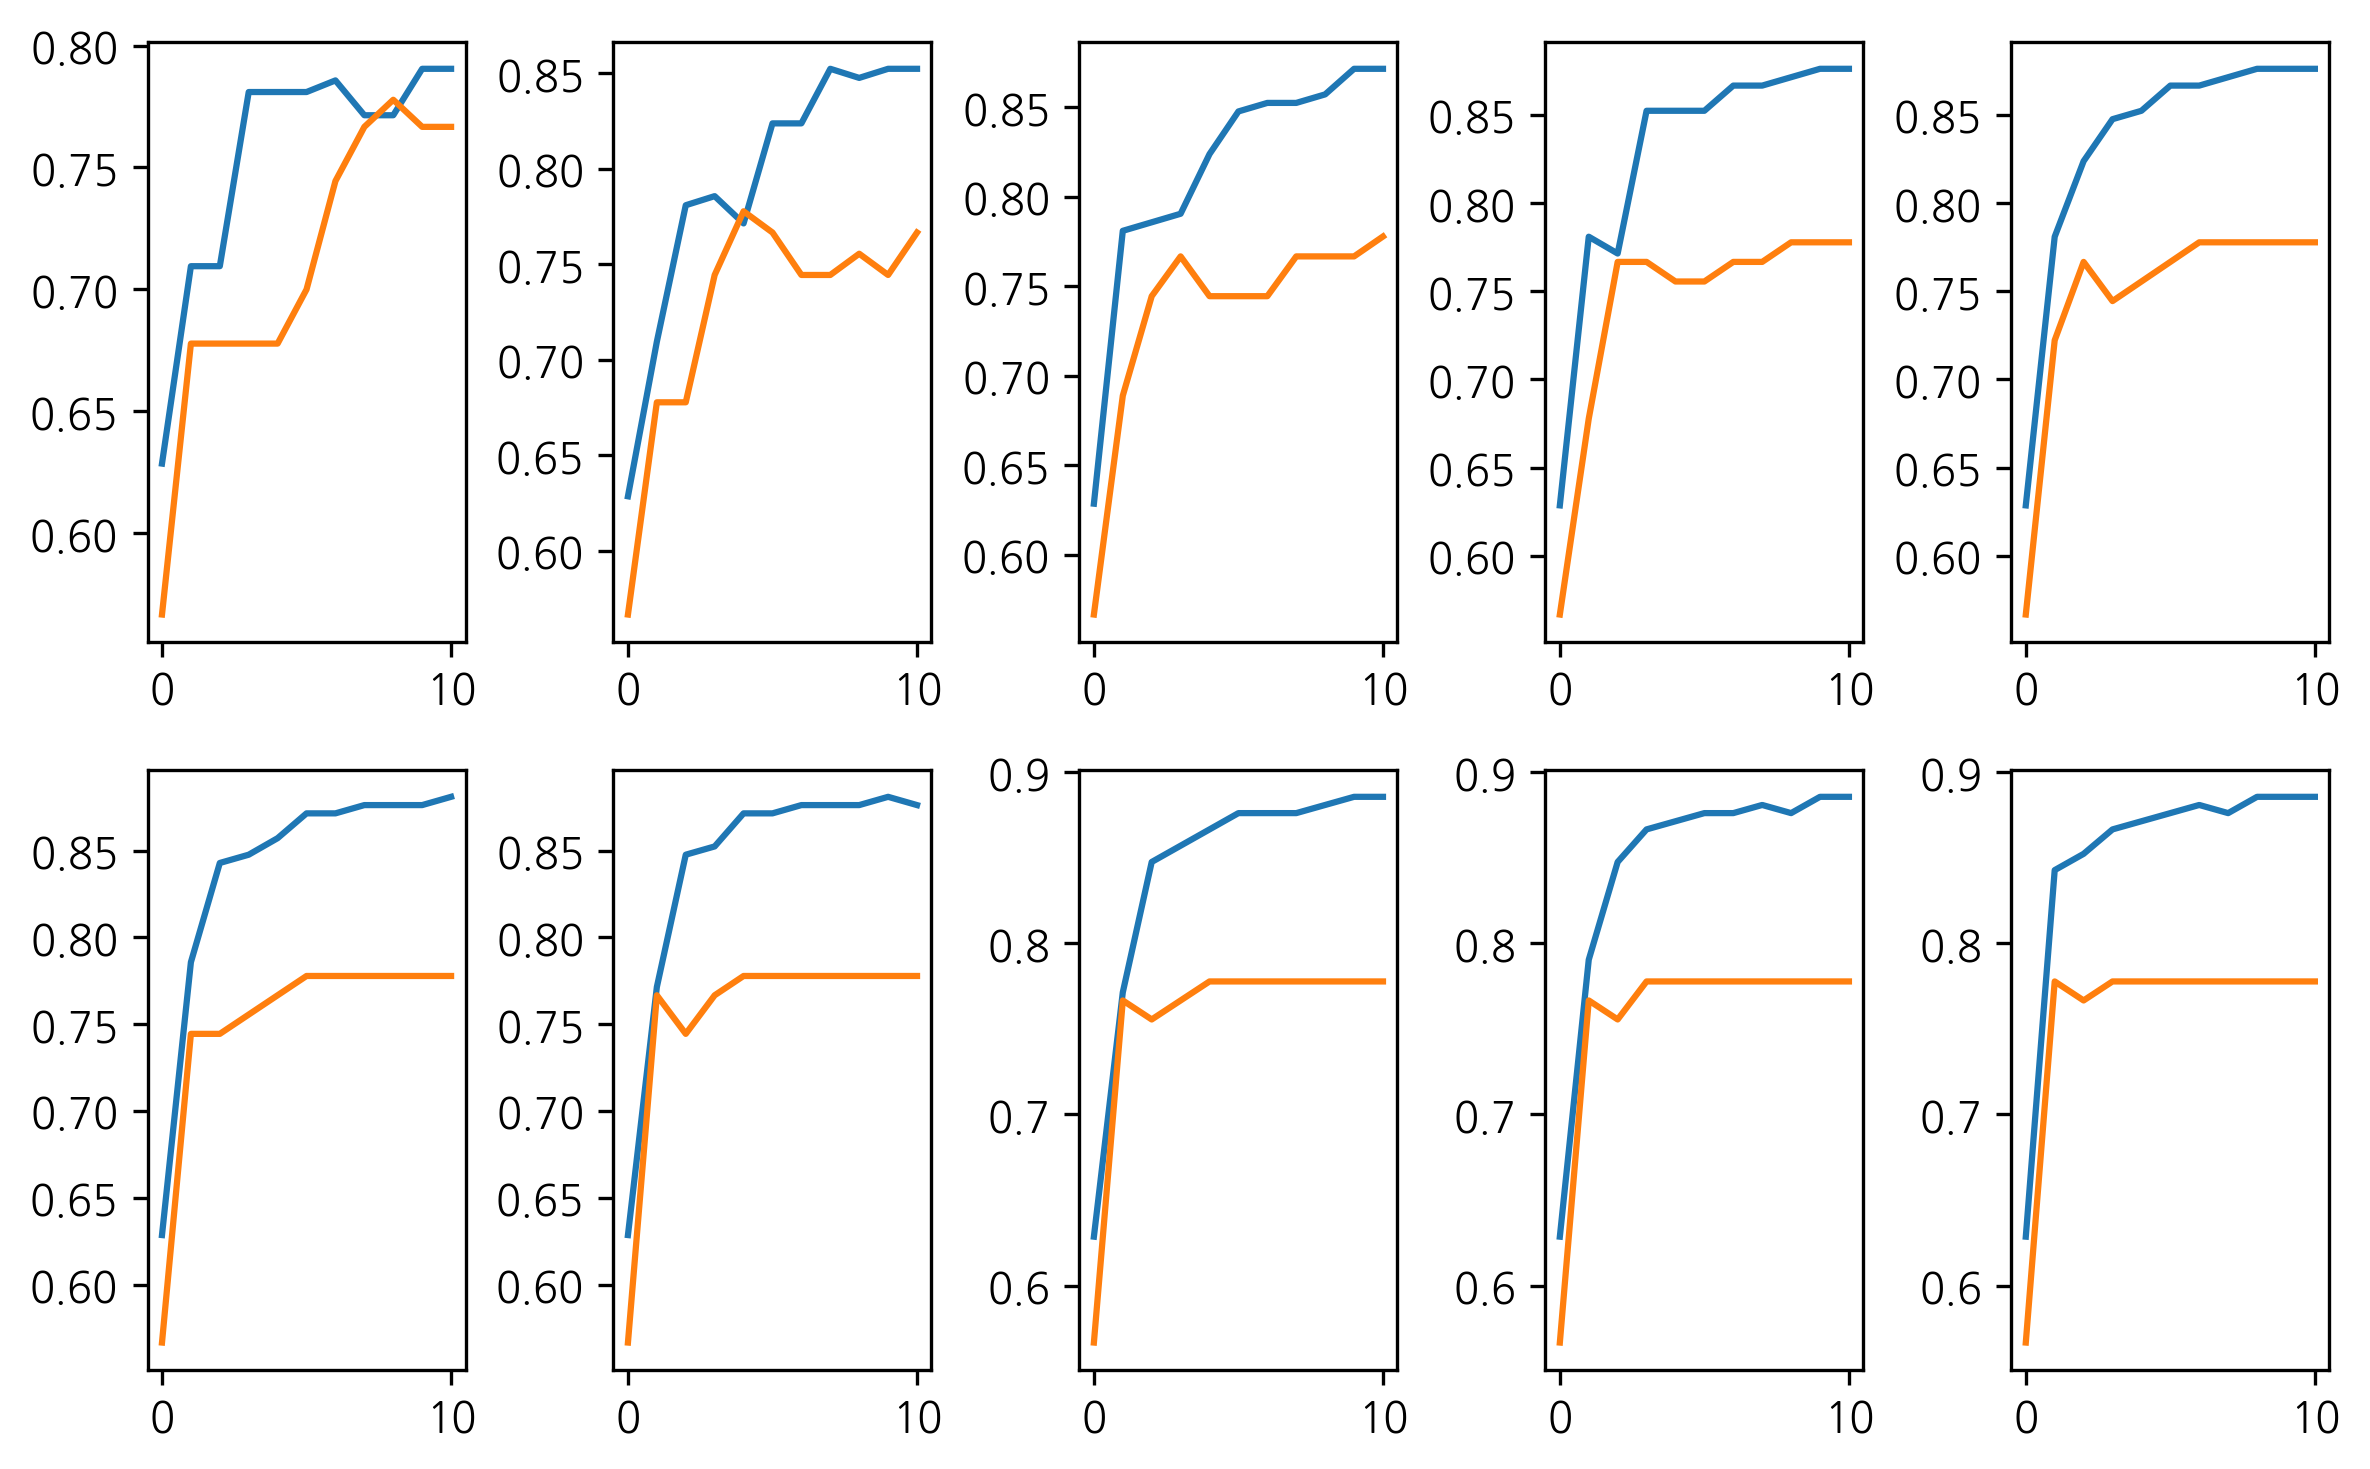

In [71]:
learning_list = np.arange(0.001, 0.011, 0.001)

ind = 1
for i in learning_list : 
    train_acc = []
    test_acc = []

    for n in range(1, 1101, 100) : 
        model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=n, learning_rate=i).fit(x_train, y_train)

        train_acc.append(accuracy_score(y_train, model.predict(x_train))) 
        test_acc.append(cross_val_score(model, x_test, y_test, cv=5).mean()) 

    plt.subplot(2,5,ind)
    plt.plot(range(len(range(1, 1101, 100))), train_acc)
    plt.plot(range(len(range(1, 1101, 100))), test_acc)
    ind += 1
plt.tight_layout() 

## 학습률 커질 수록 과적합 정도가 심해진다. 

In [81]:
# 2. 
test_acc = []
for n in lr : 
    model1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=1000, learning_rate=n).fit(x_train, y_train)
    test_acc.append(cross_val_score(model1, x_test, y_test, cv=5).mean()) 
print(f'최고성능 학습률: {lr[test_acc.index(np.max(test_acc))]}')

최고성능 학습률: 0.1


In [82]:
test_acc

[0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.788888888888889,
 0.8,
 0.8,
 0.788888888888889,
 0.788888888888889]